In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# Read the Excel files
portfolio_weights_05 = pd.read_excel('all_output_results/agg_portfolio_weights.xlsx')
portfolio_weights_10 = pd.read_excel('all_output_results/cons_portfolio_weights.xlsx')

/var/folders/ky/n1n3tvzn3zb6_44x8nfzwn700000gn/T/ipykernel_71643/3488853115.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


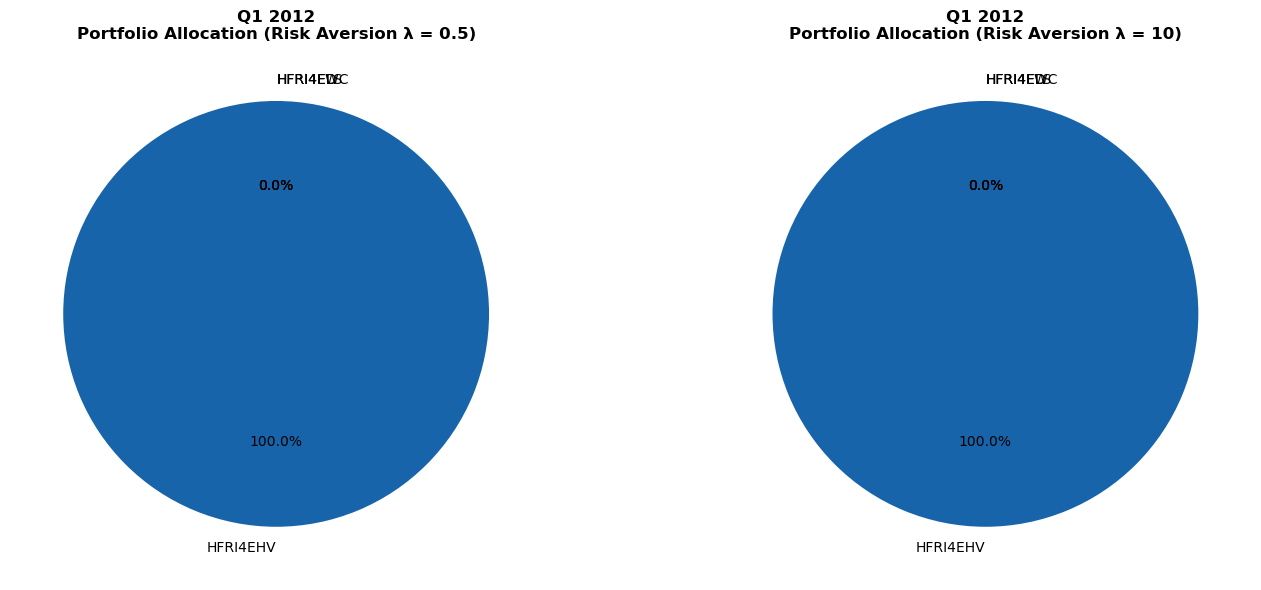

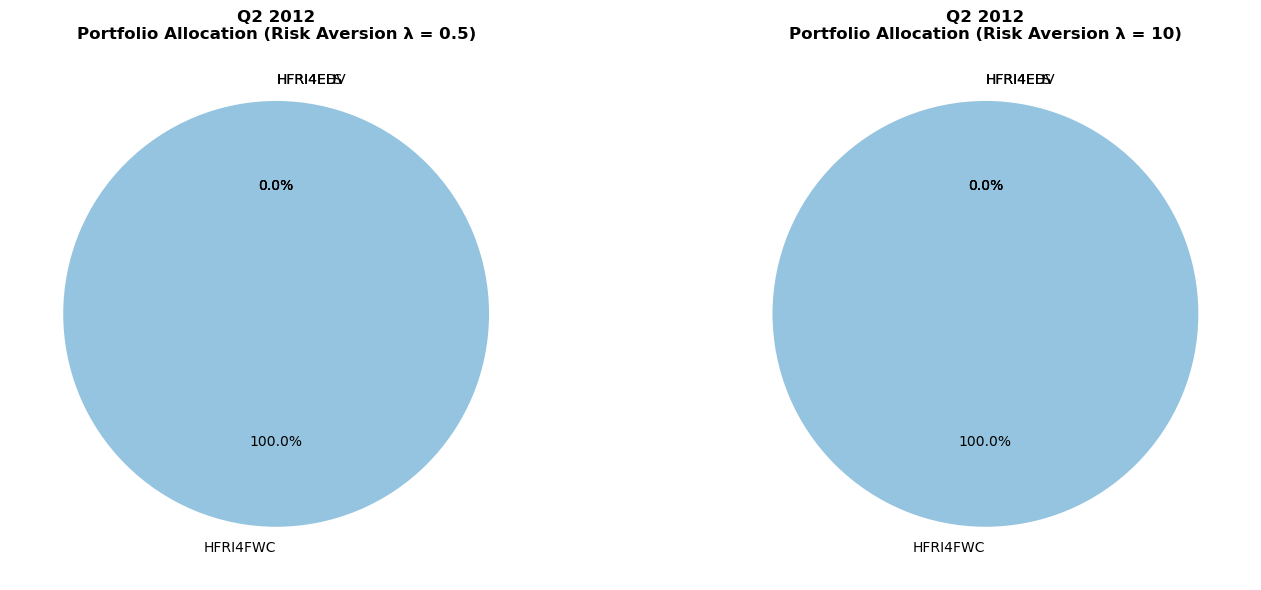

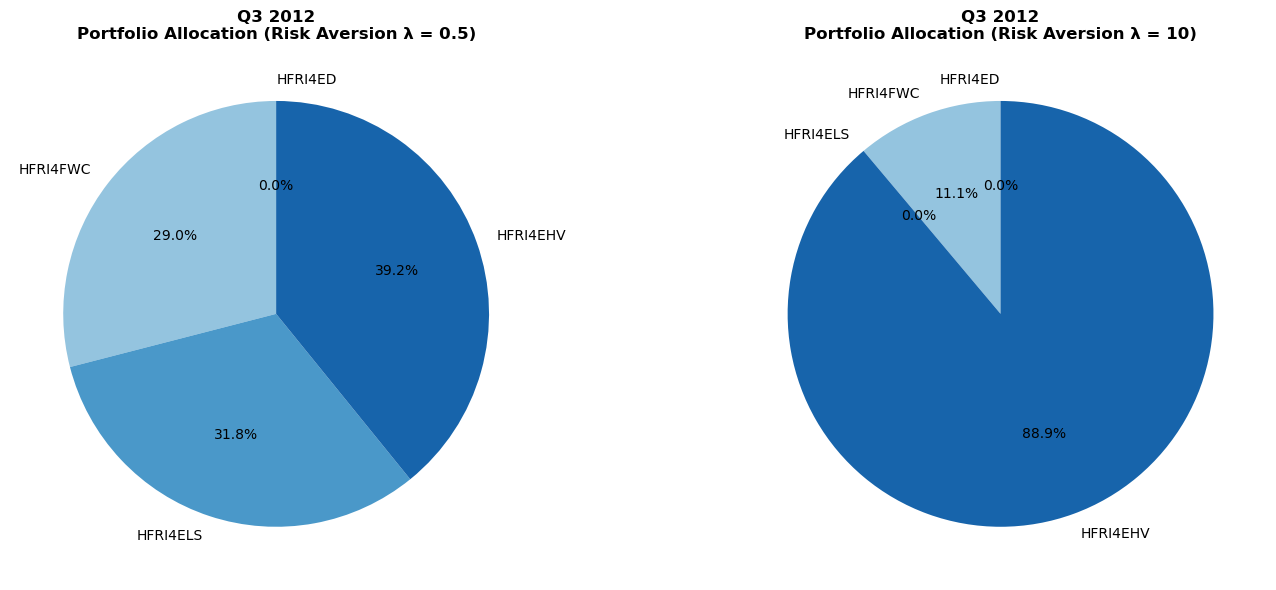

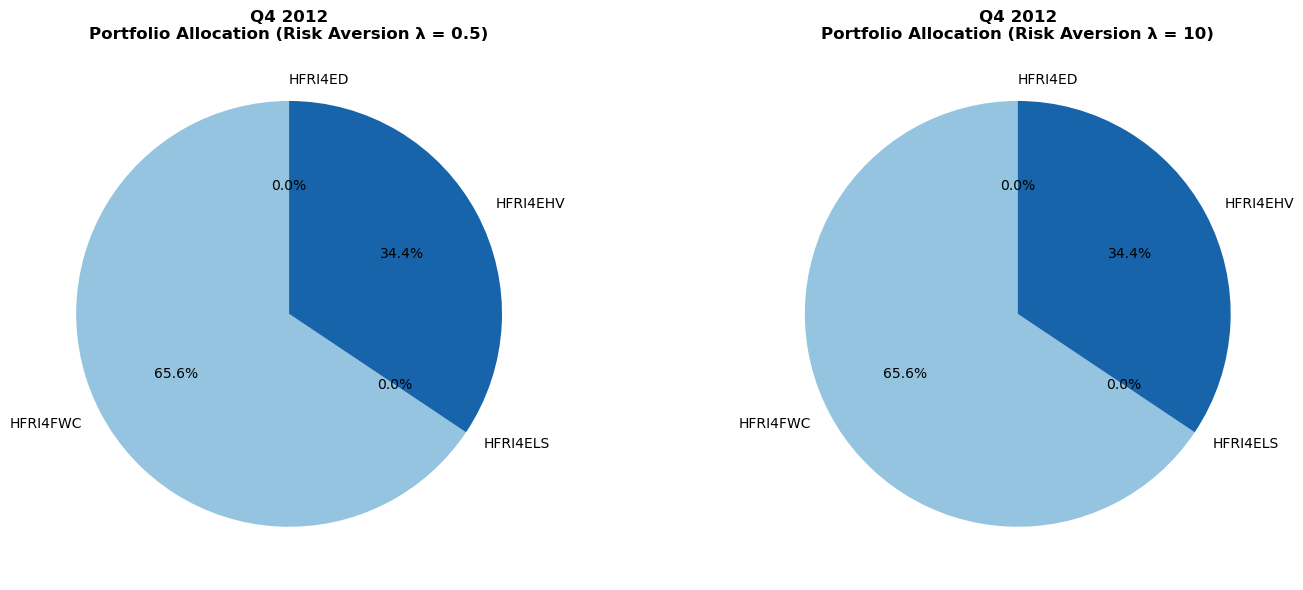

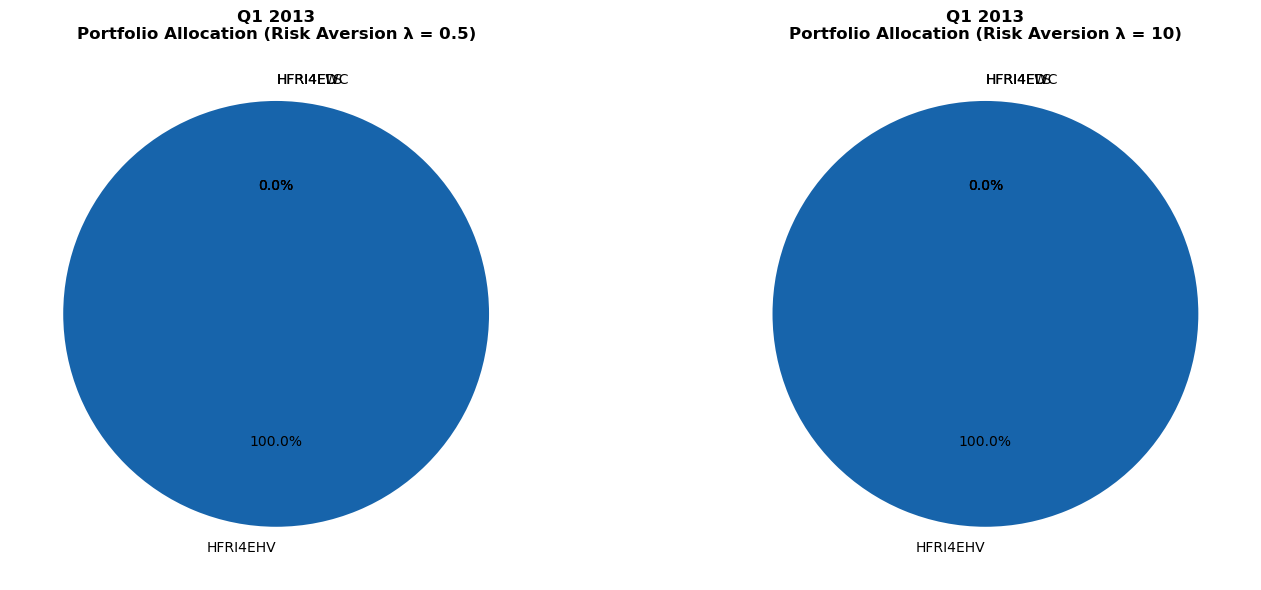

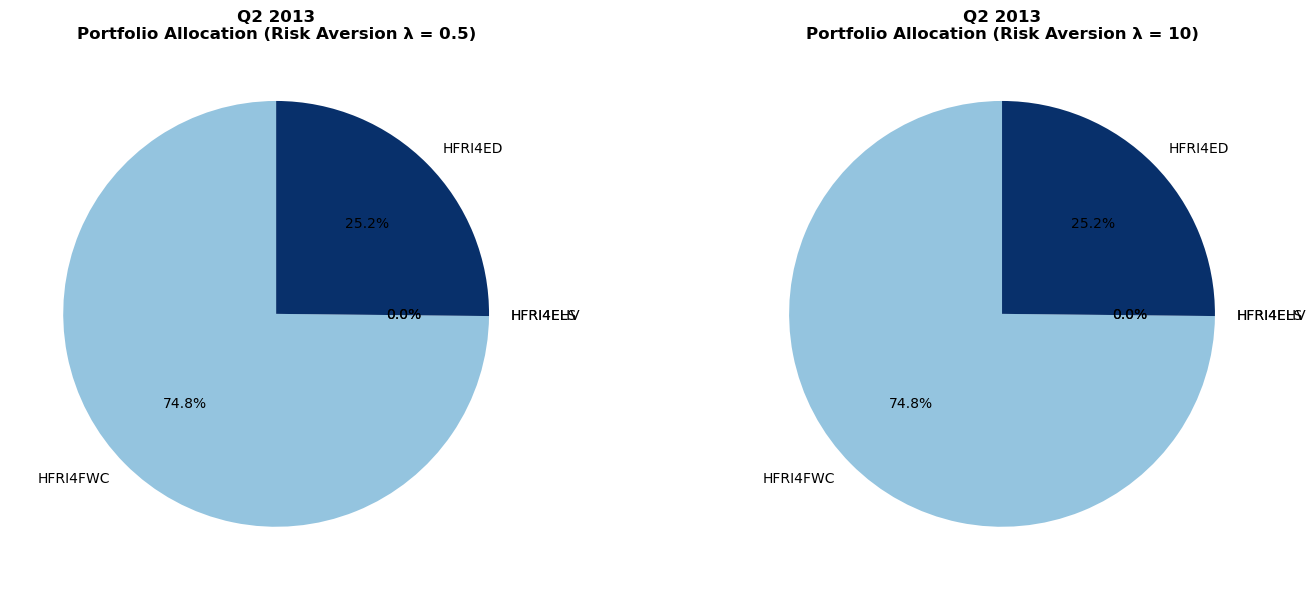

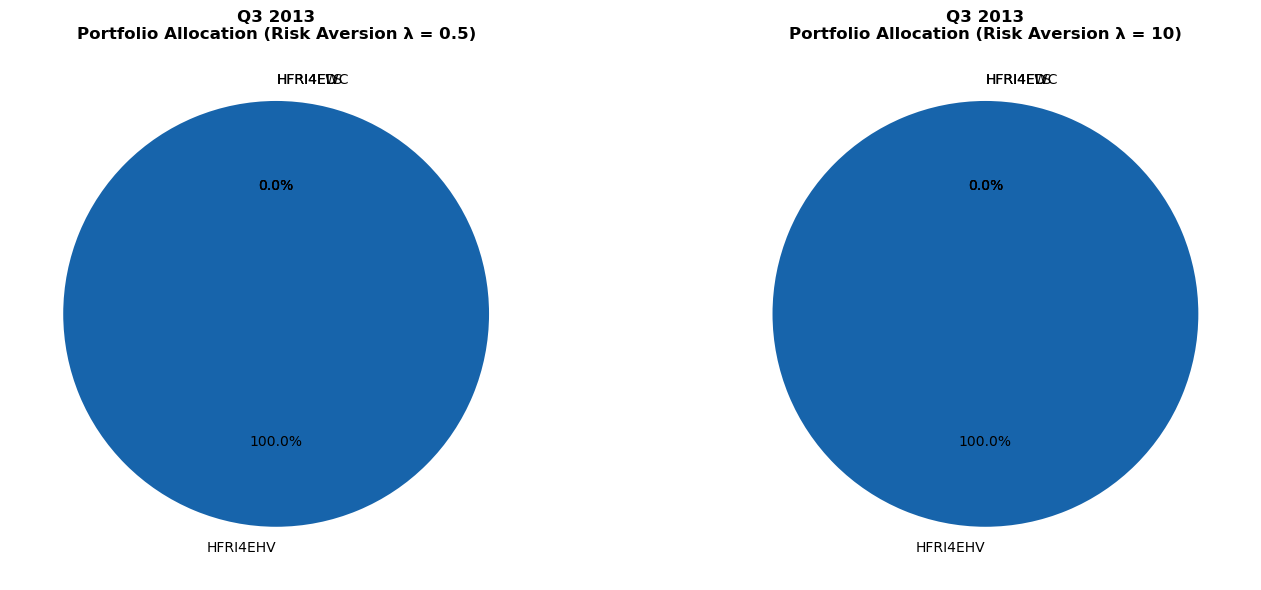

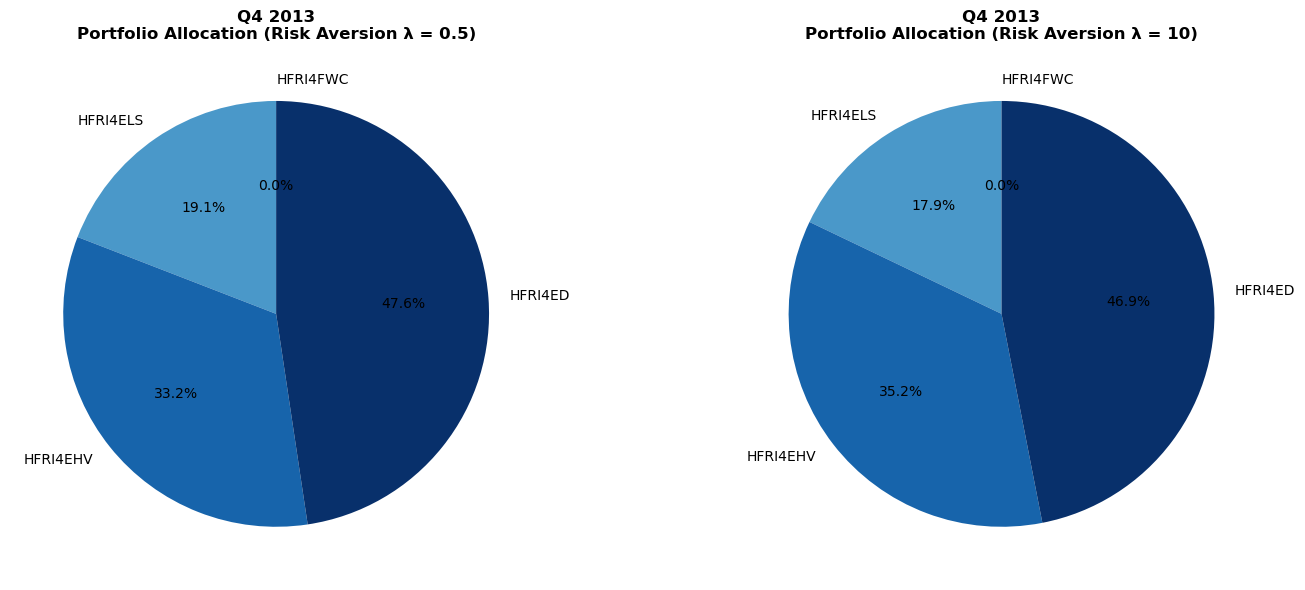

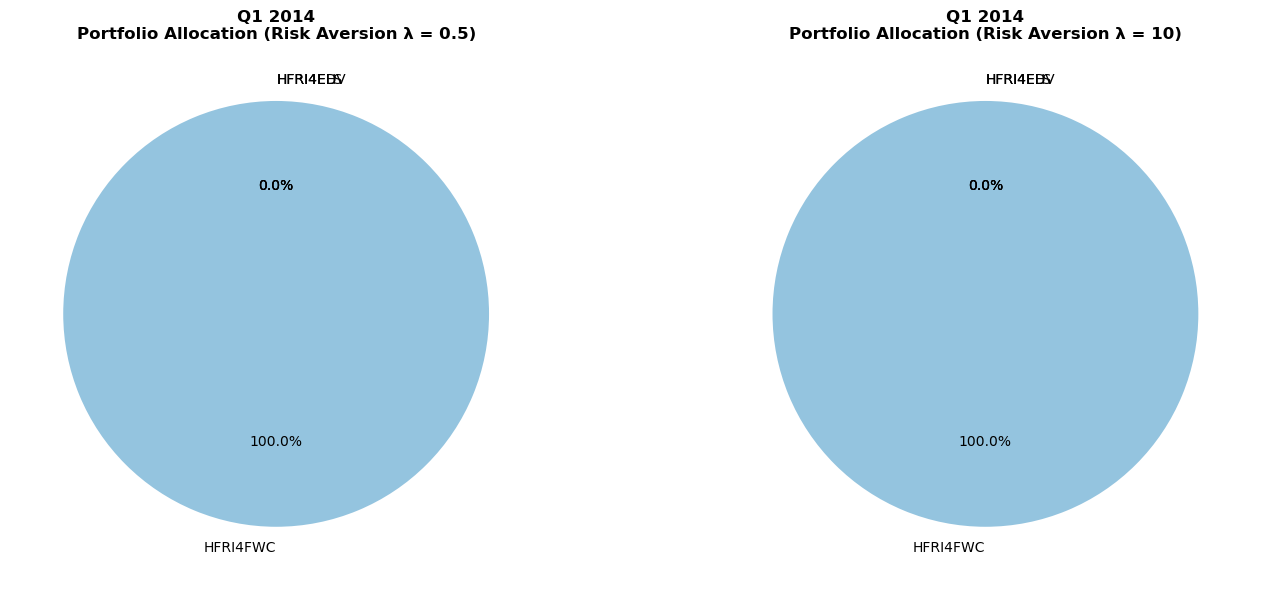

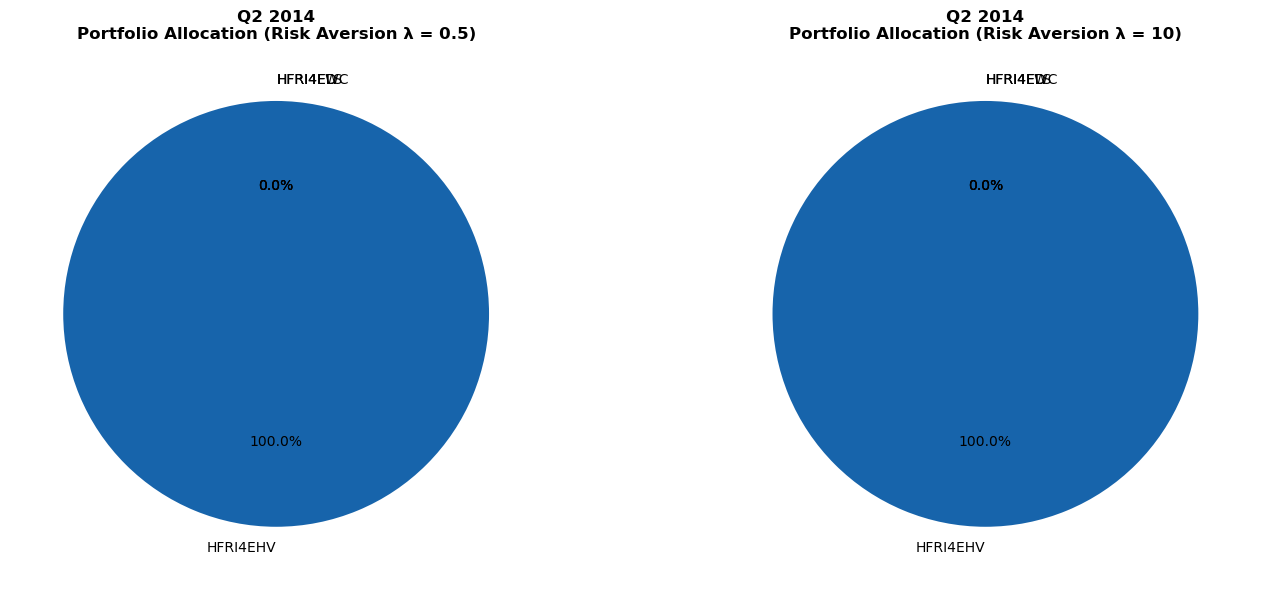

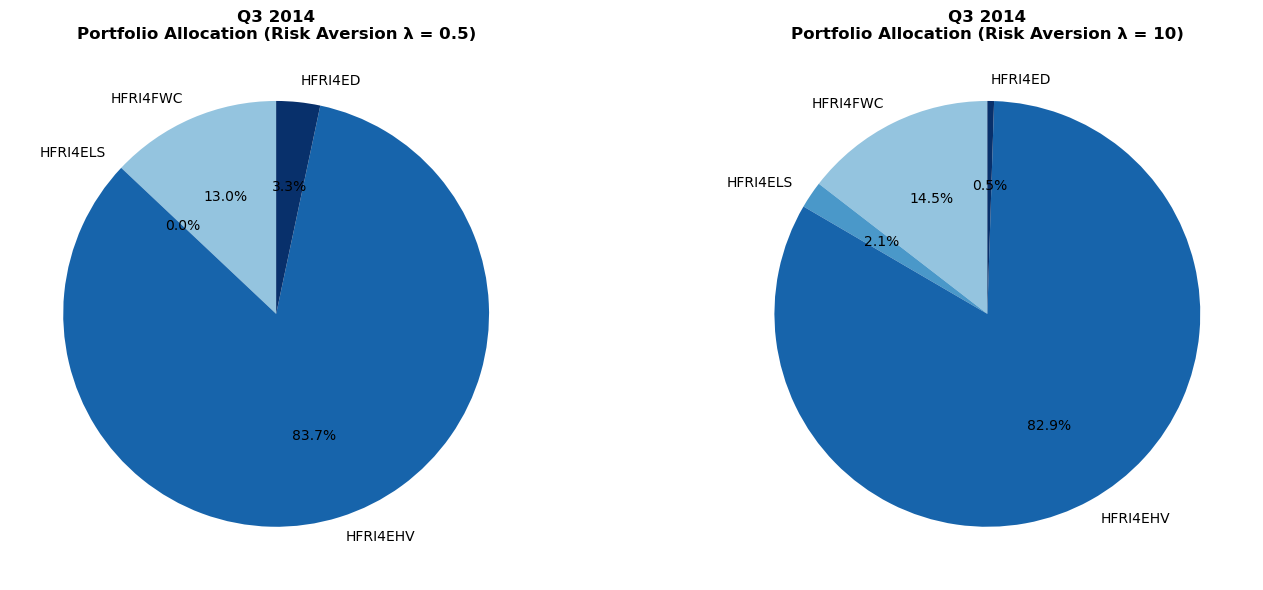

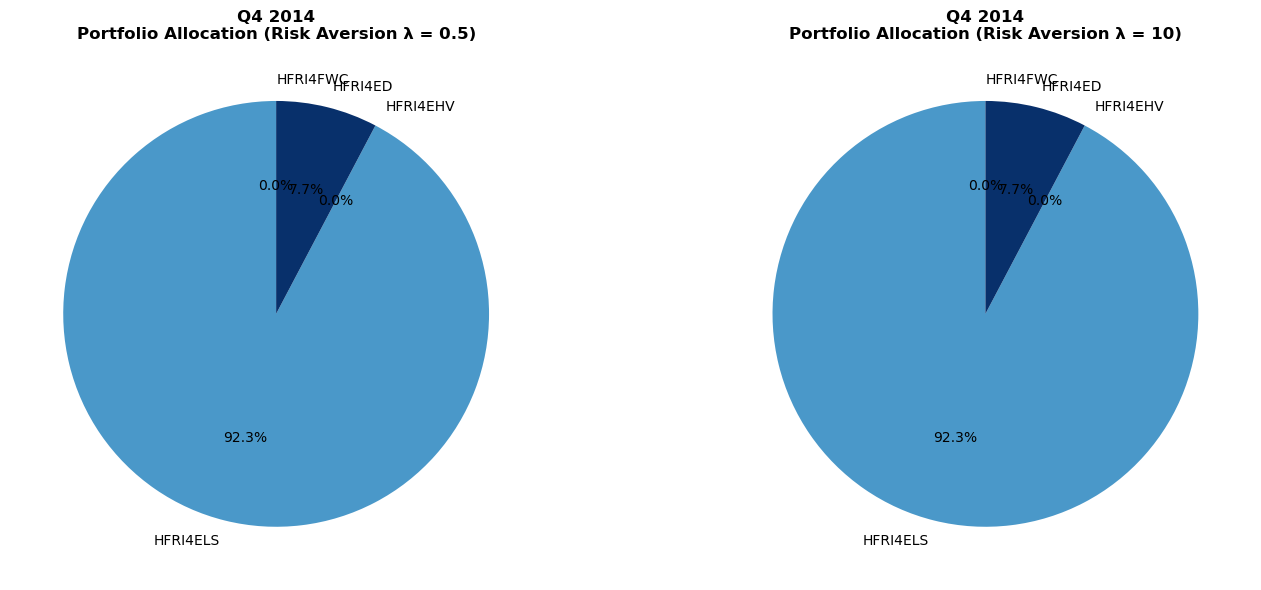

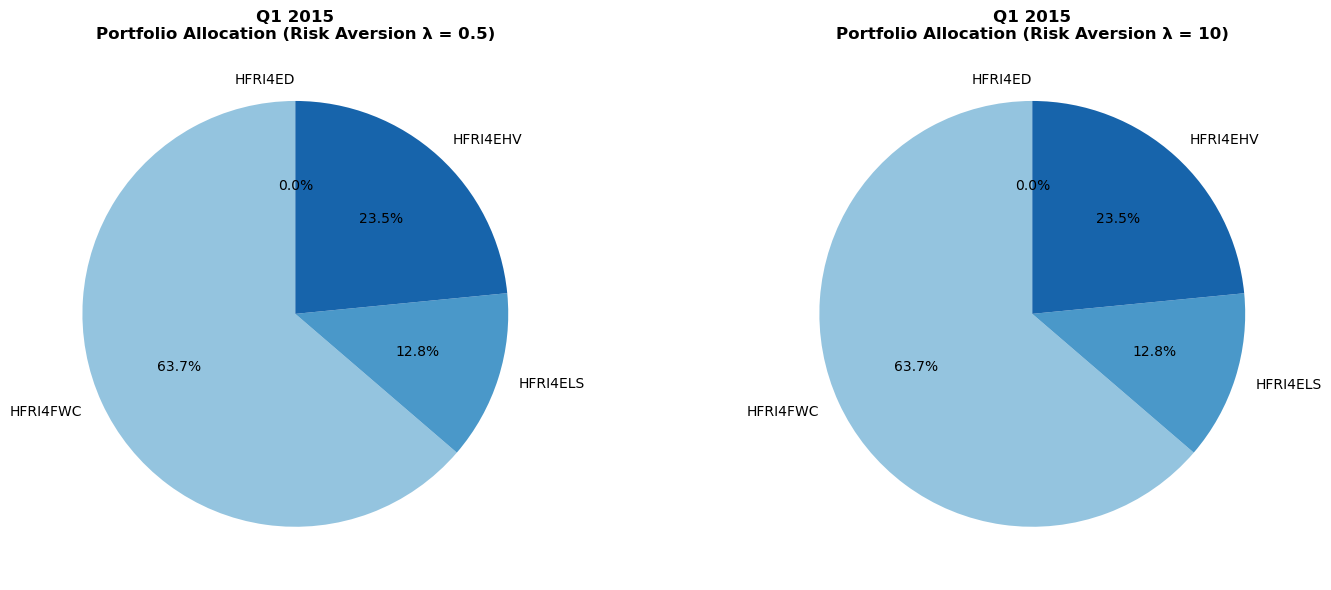

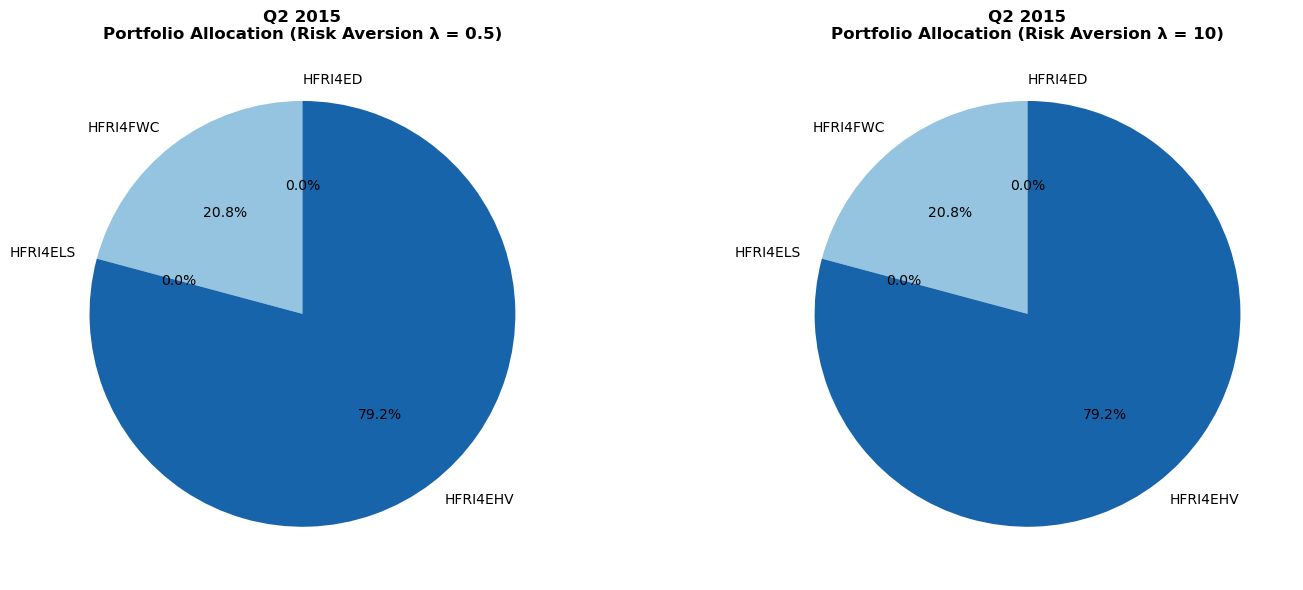

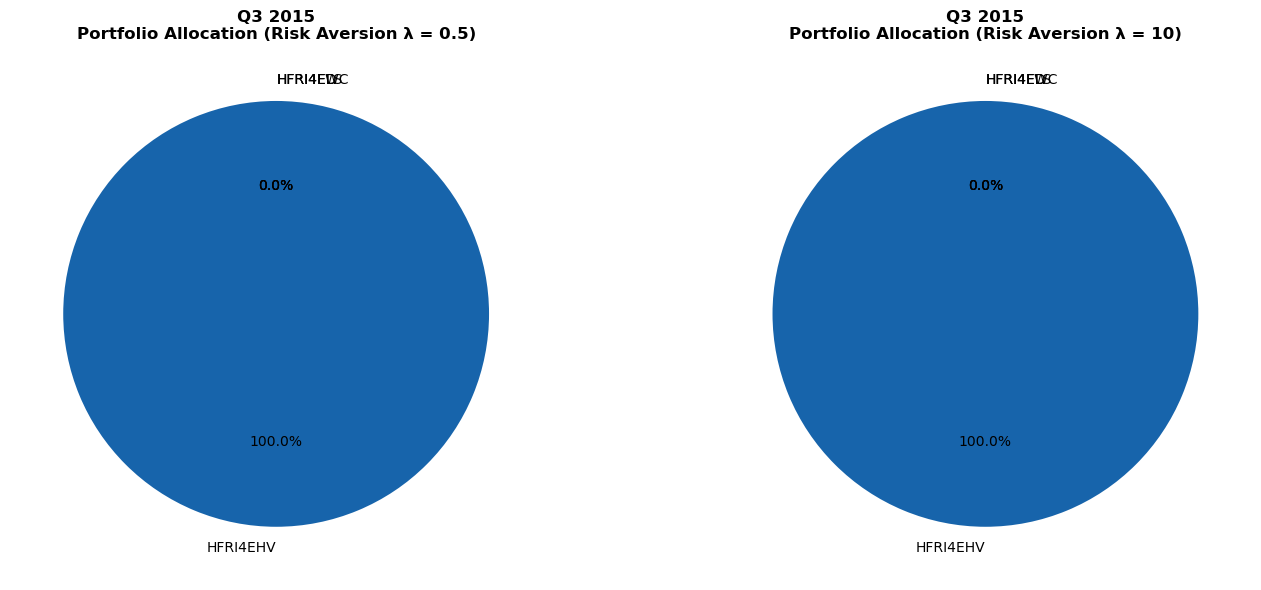

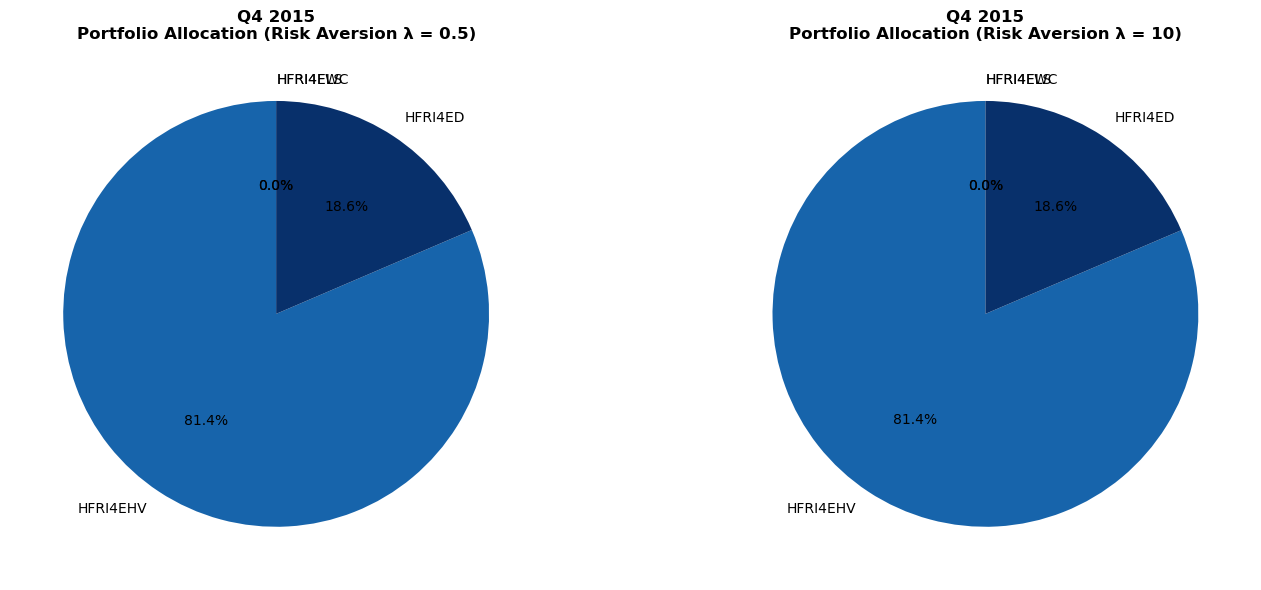

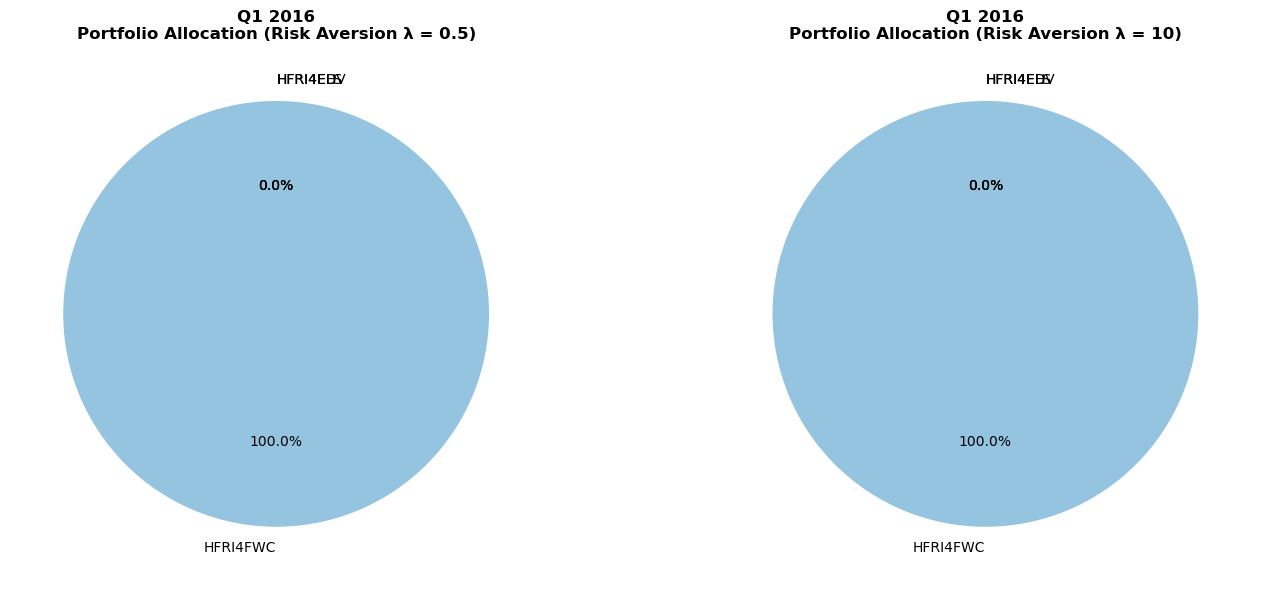

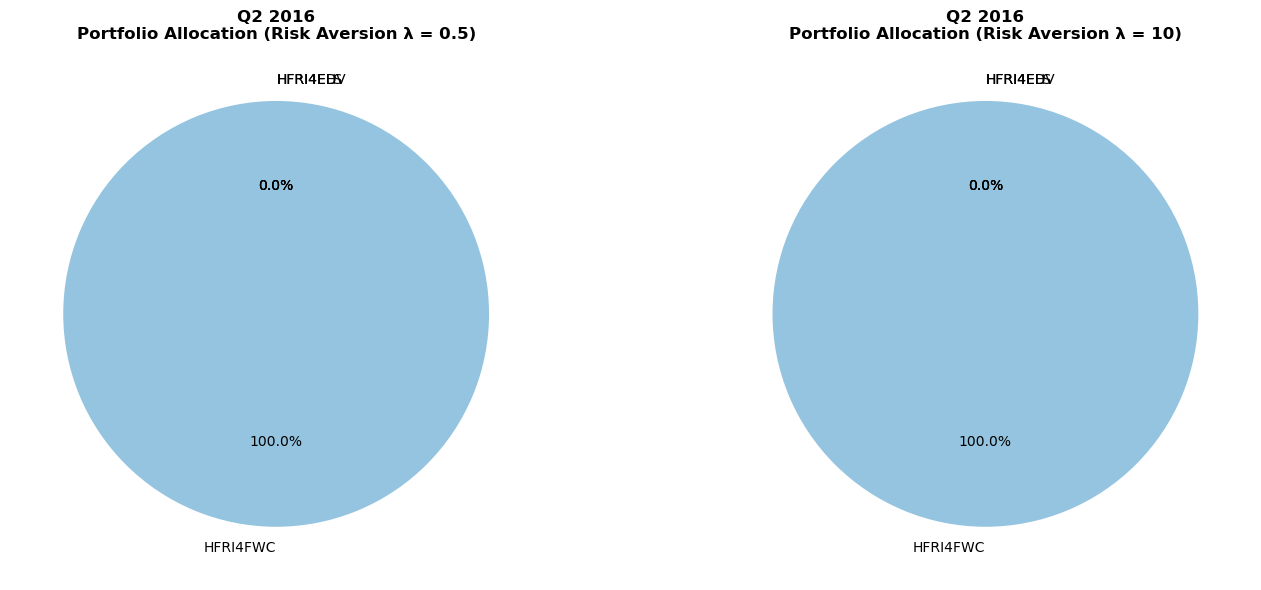

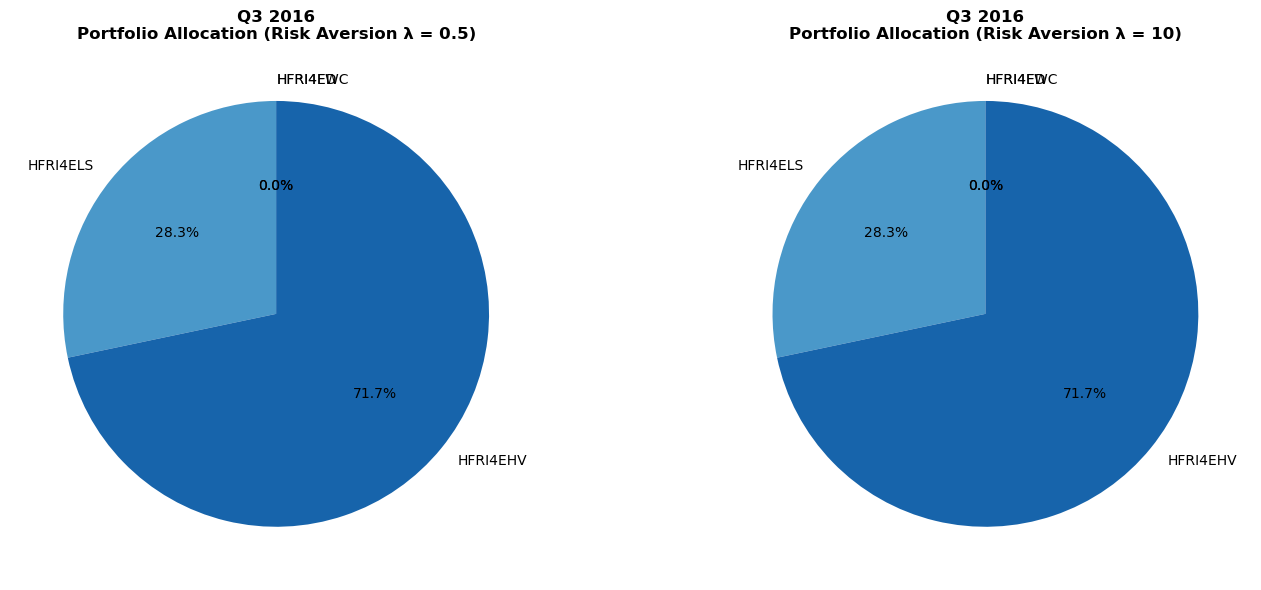

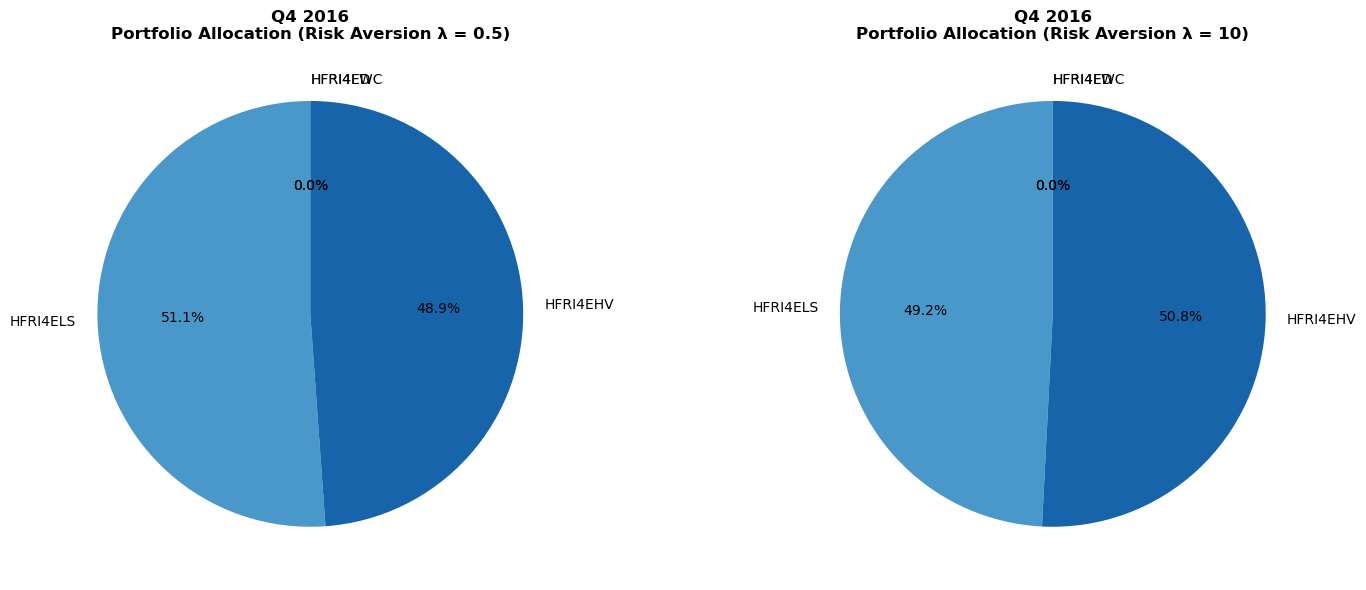

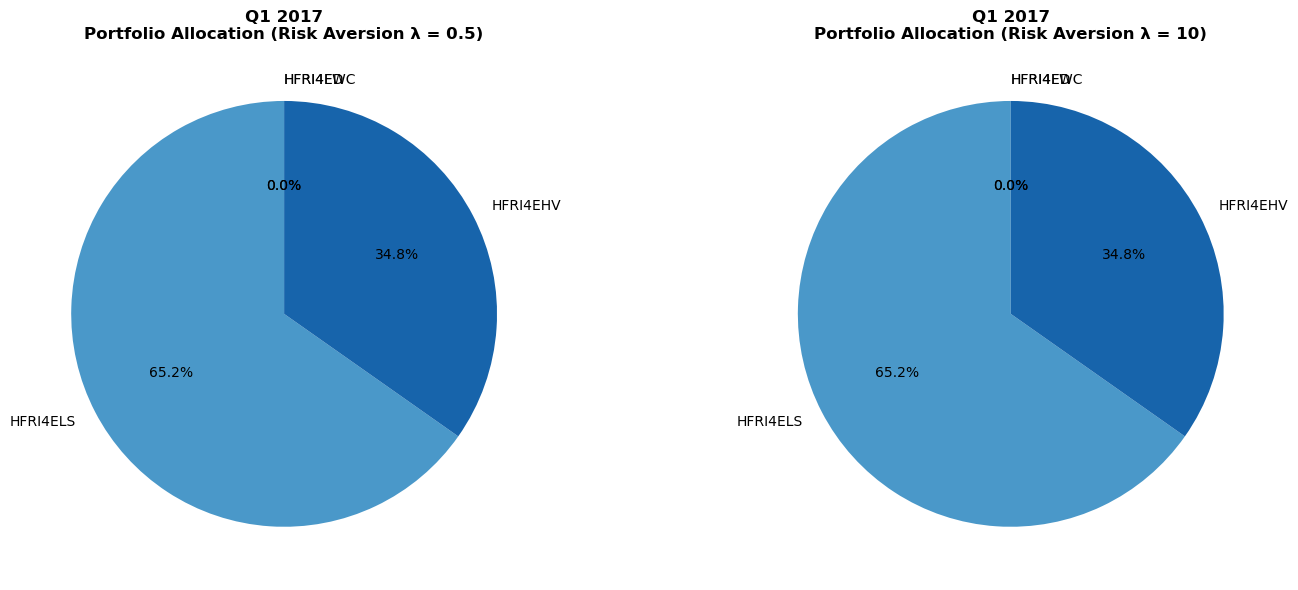

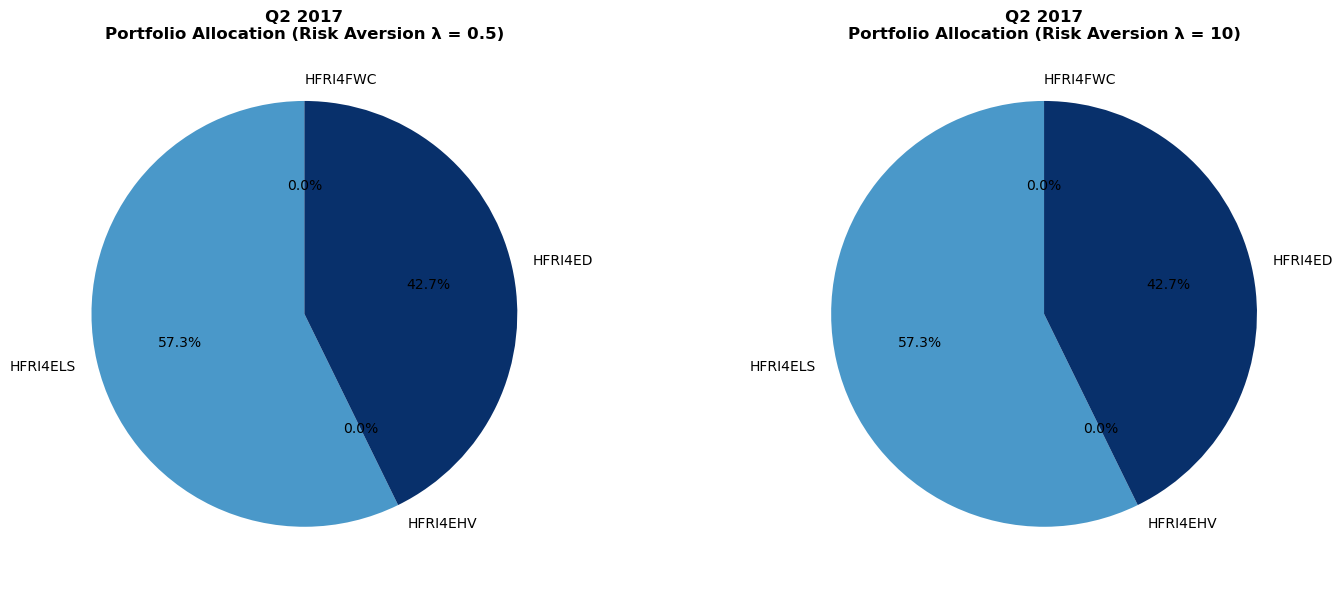

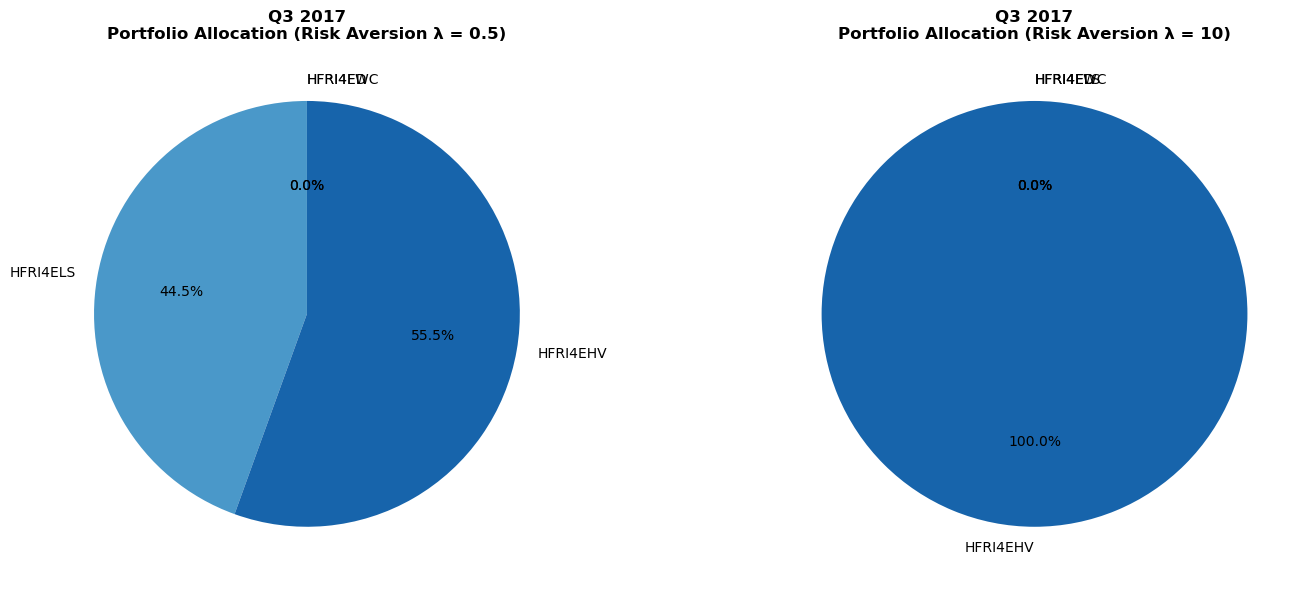

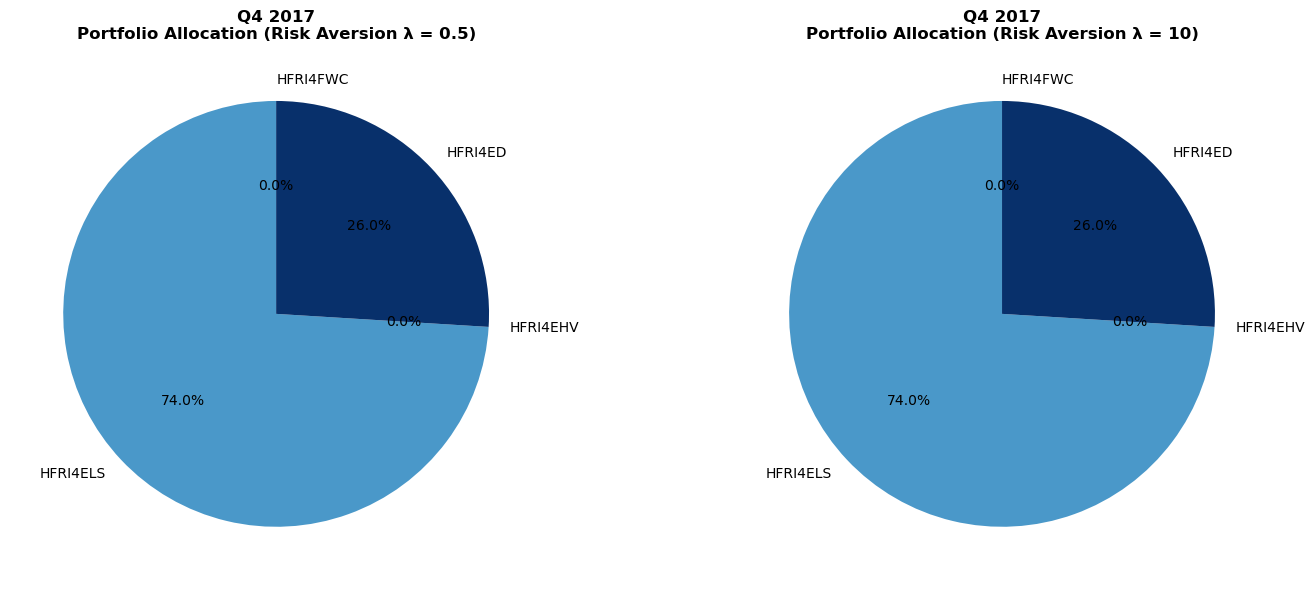

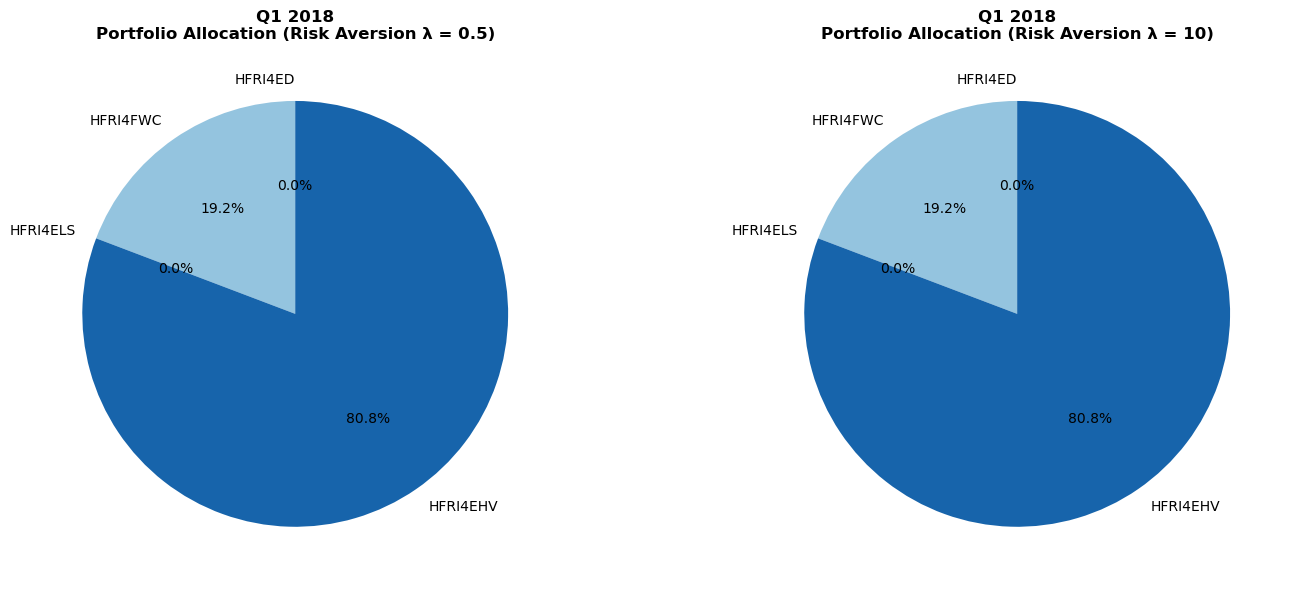

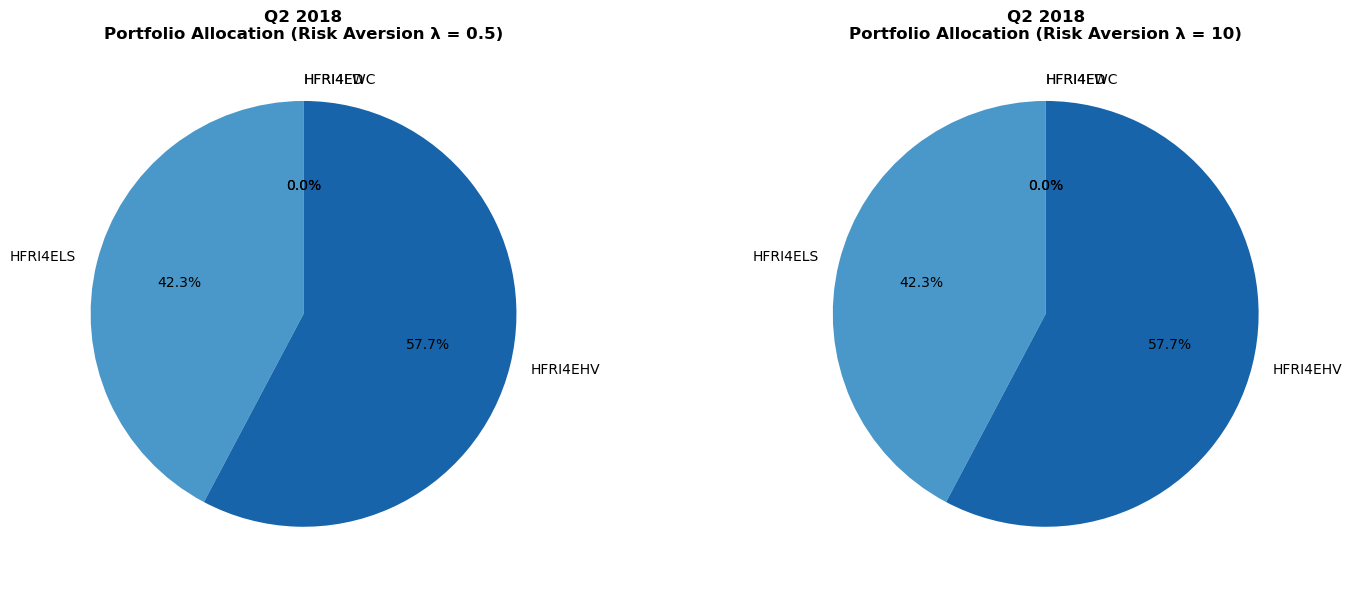

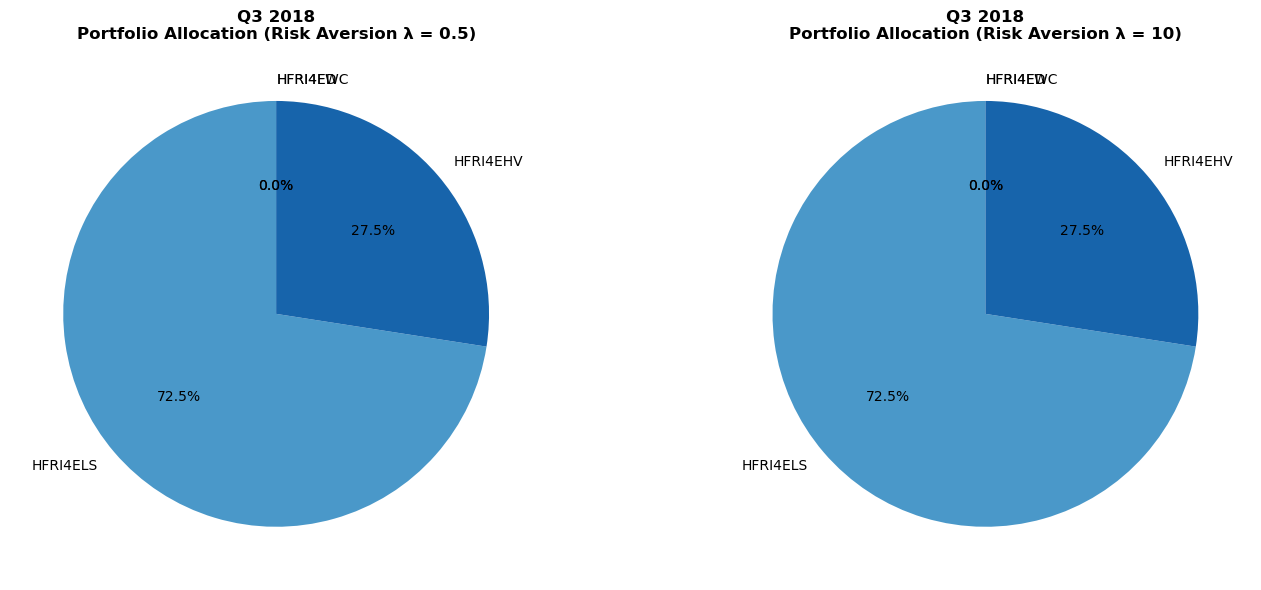

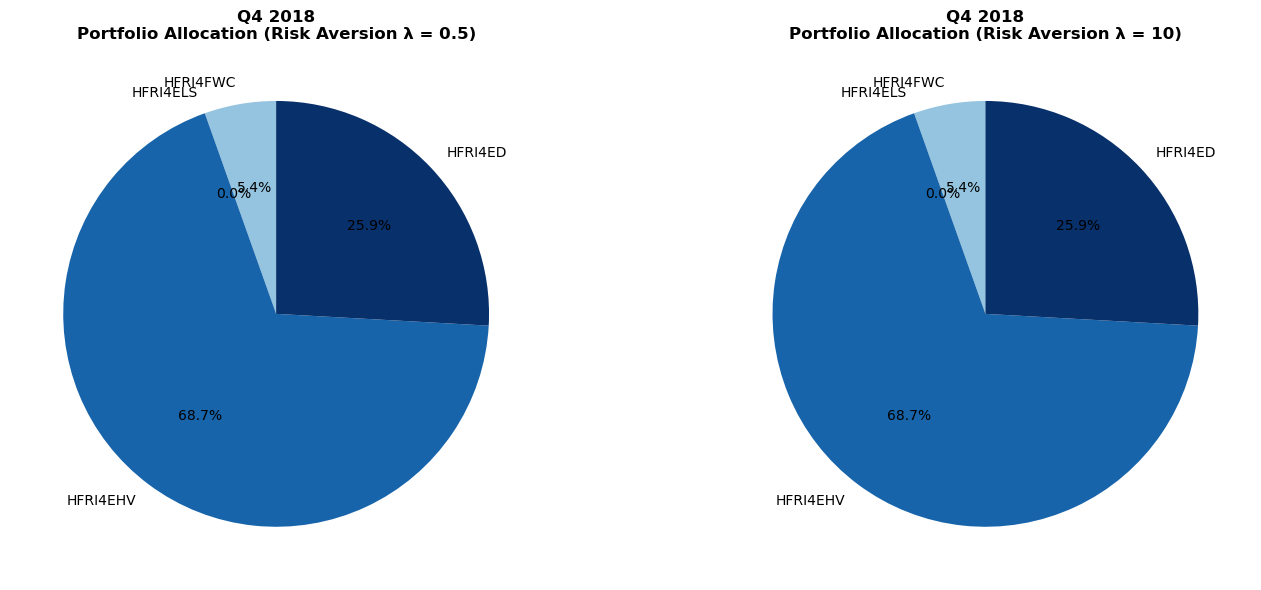

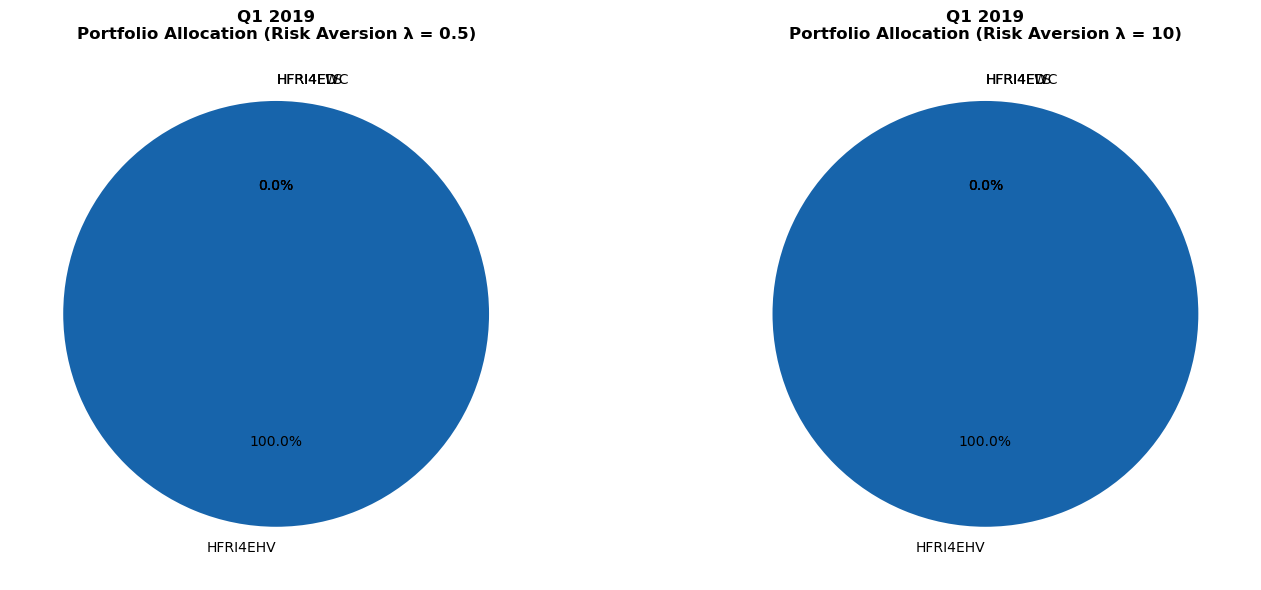

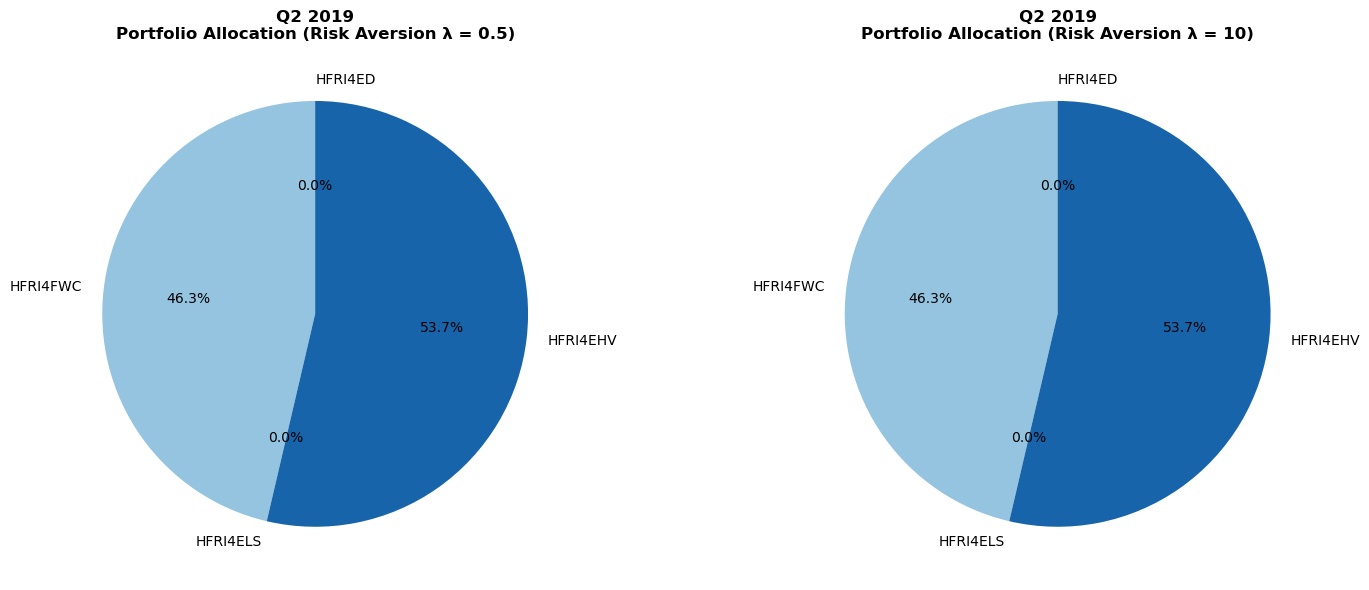

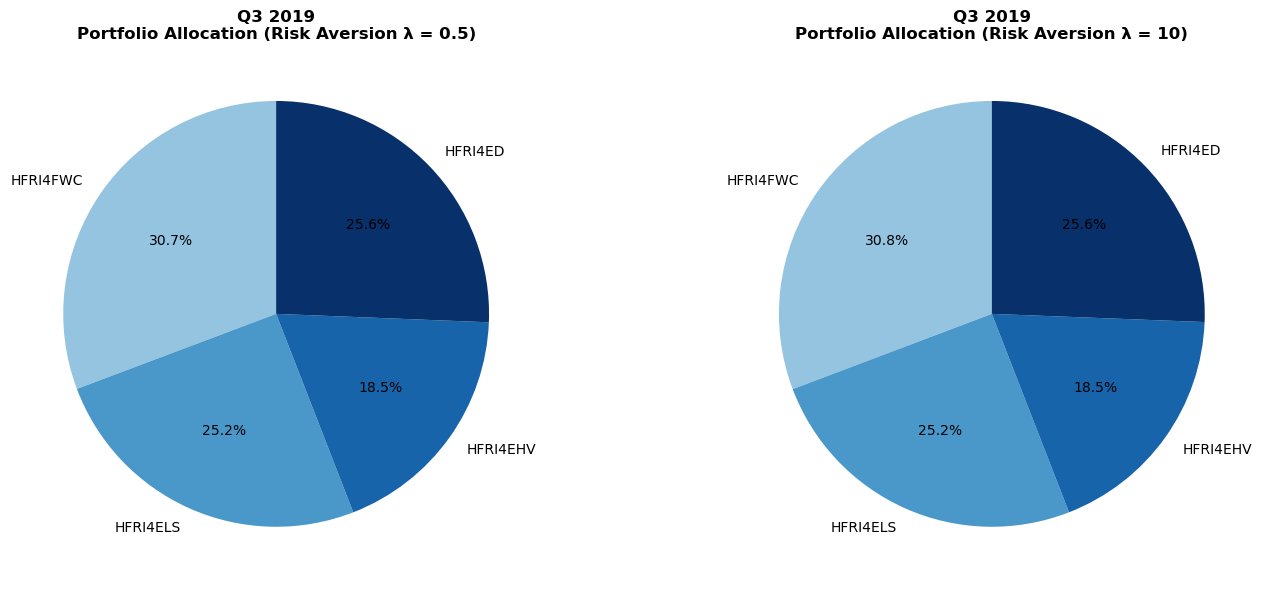

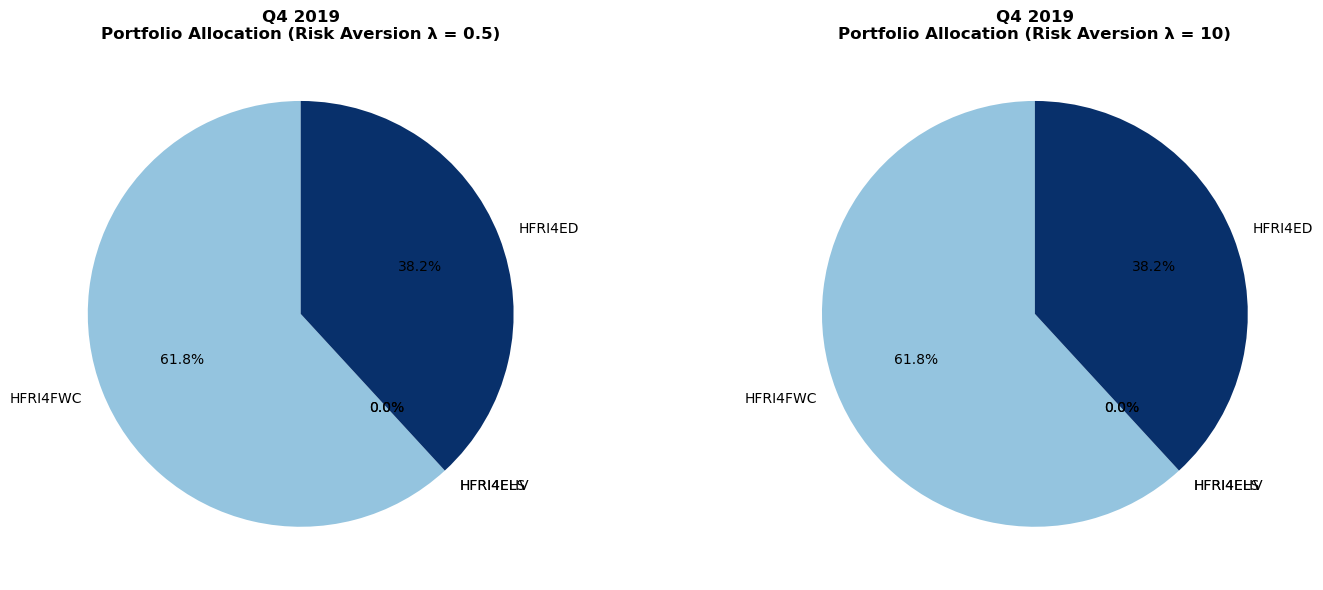

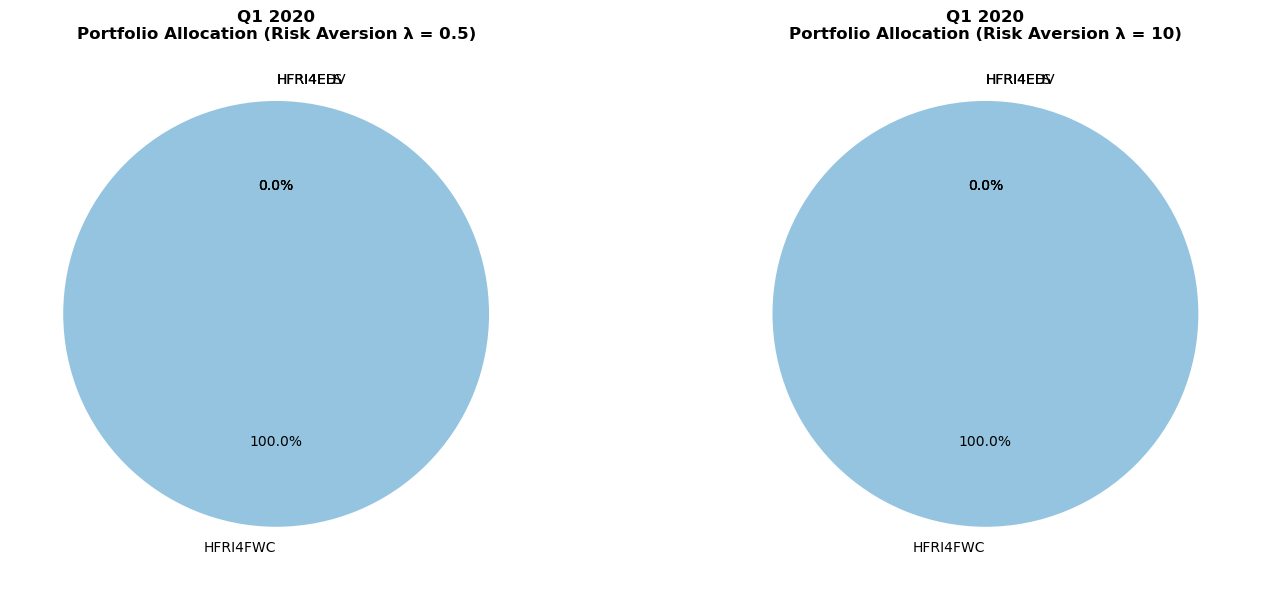

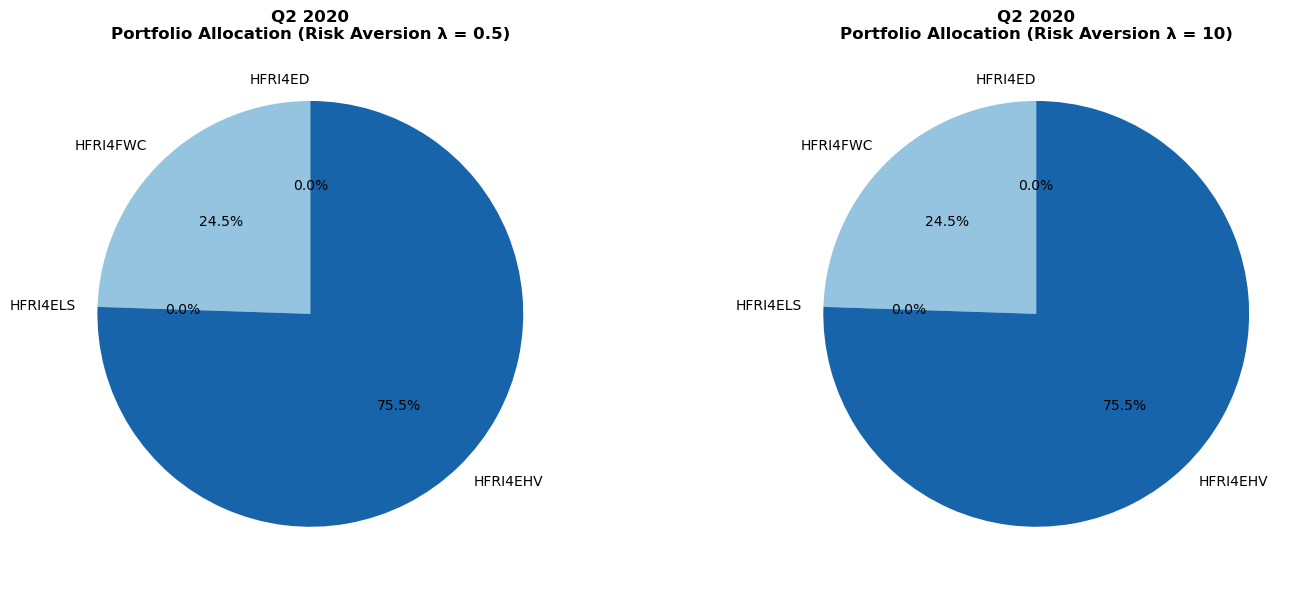

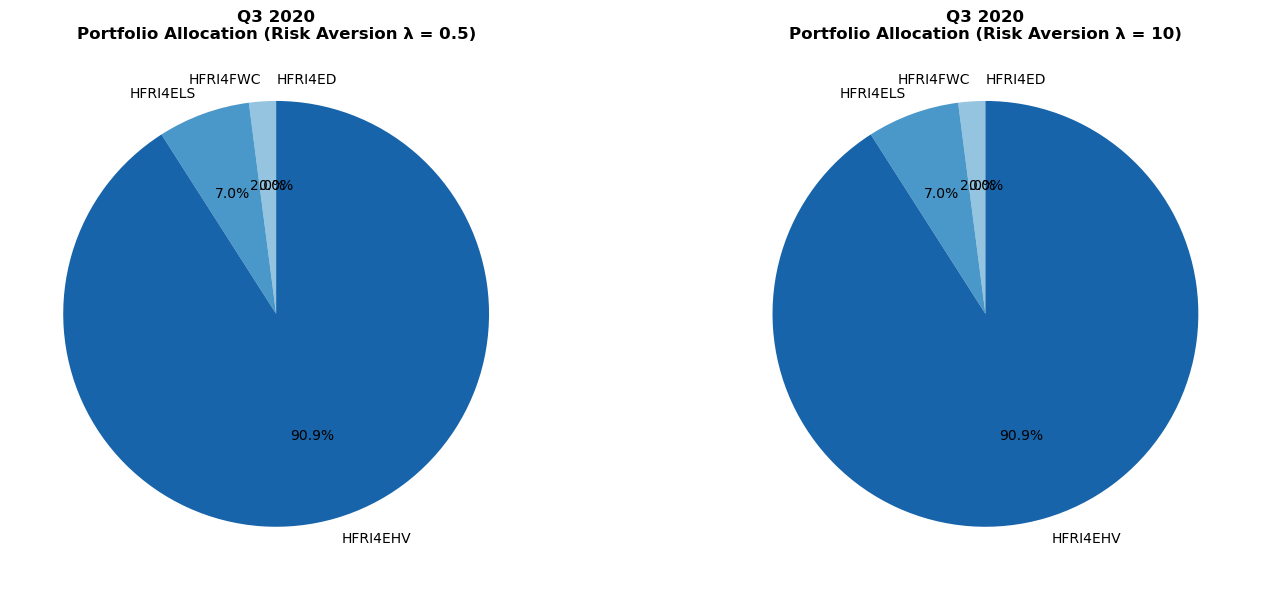

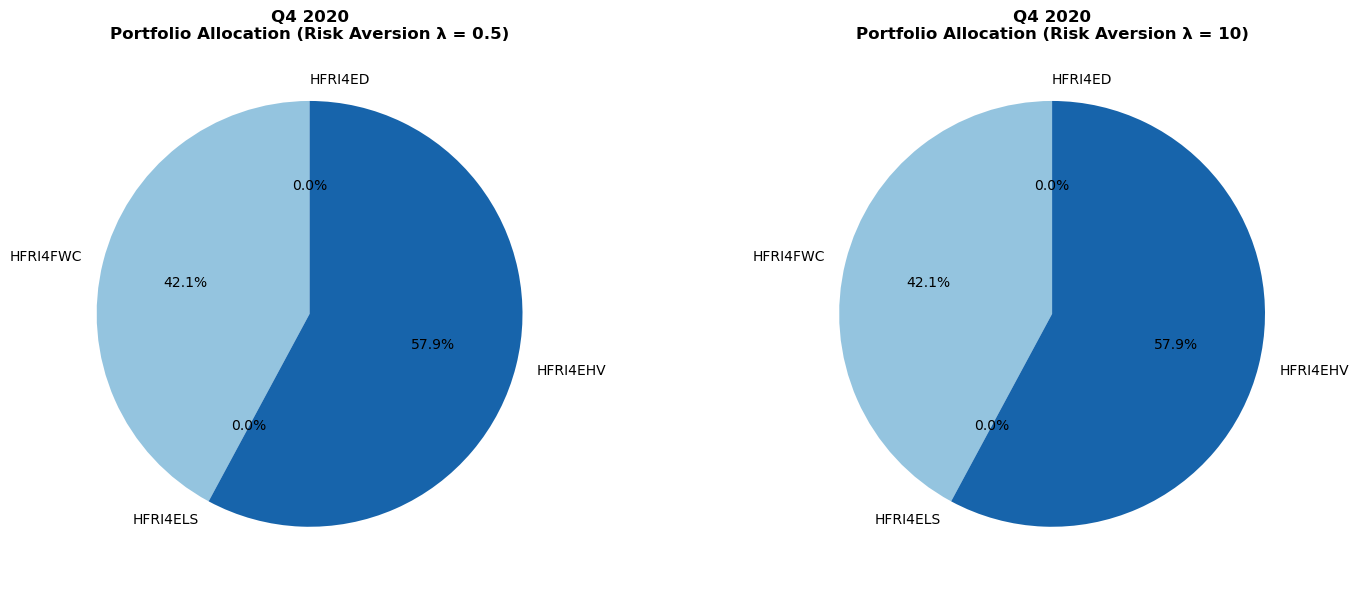

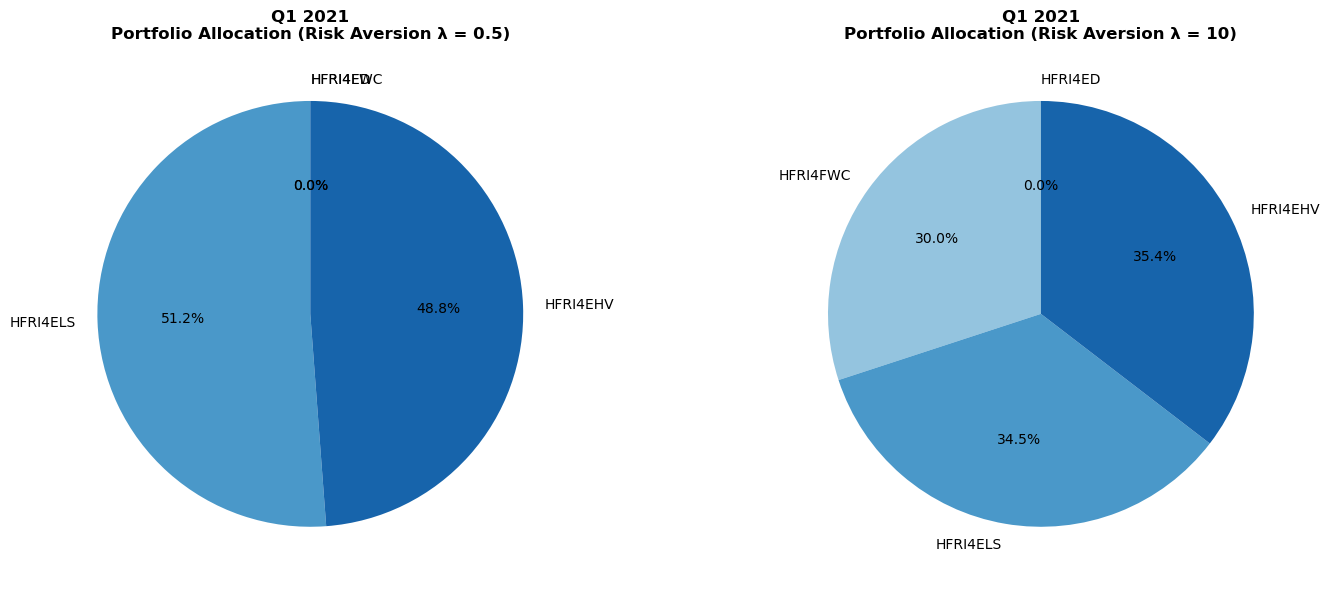

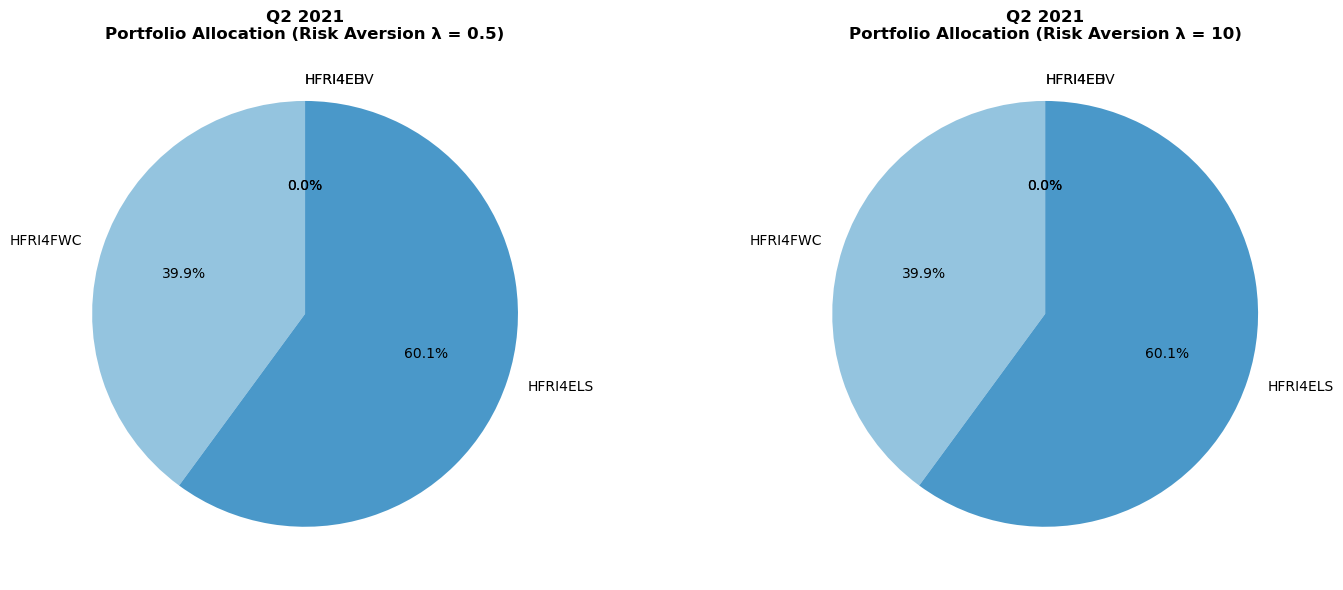

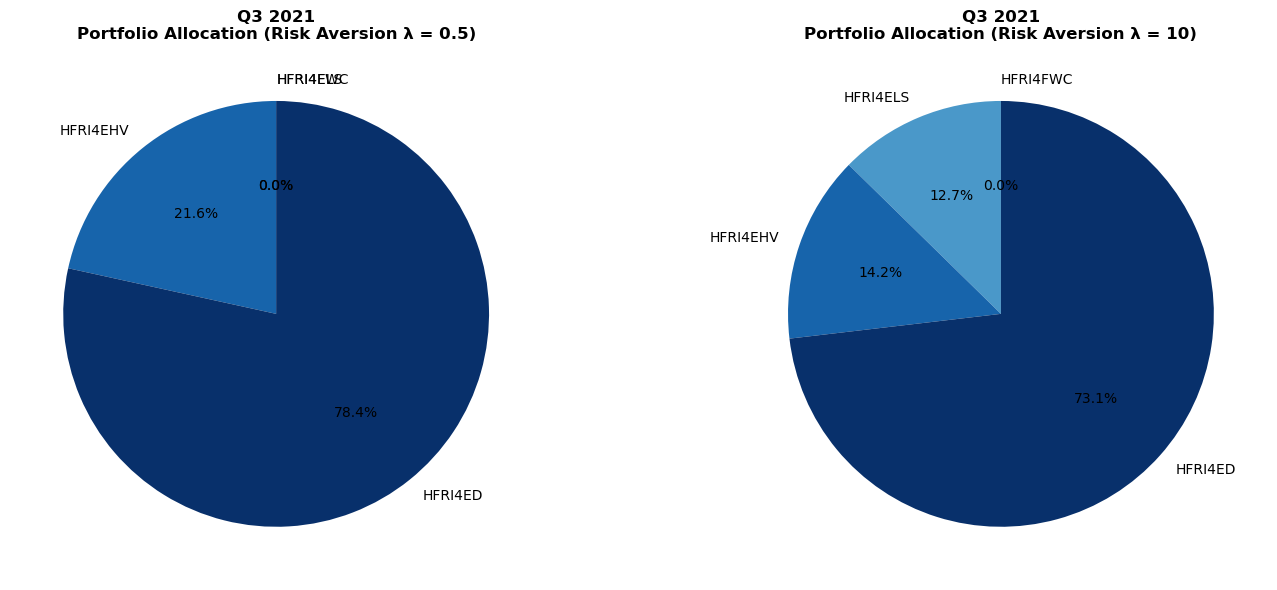

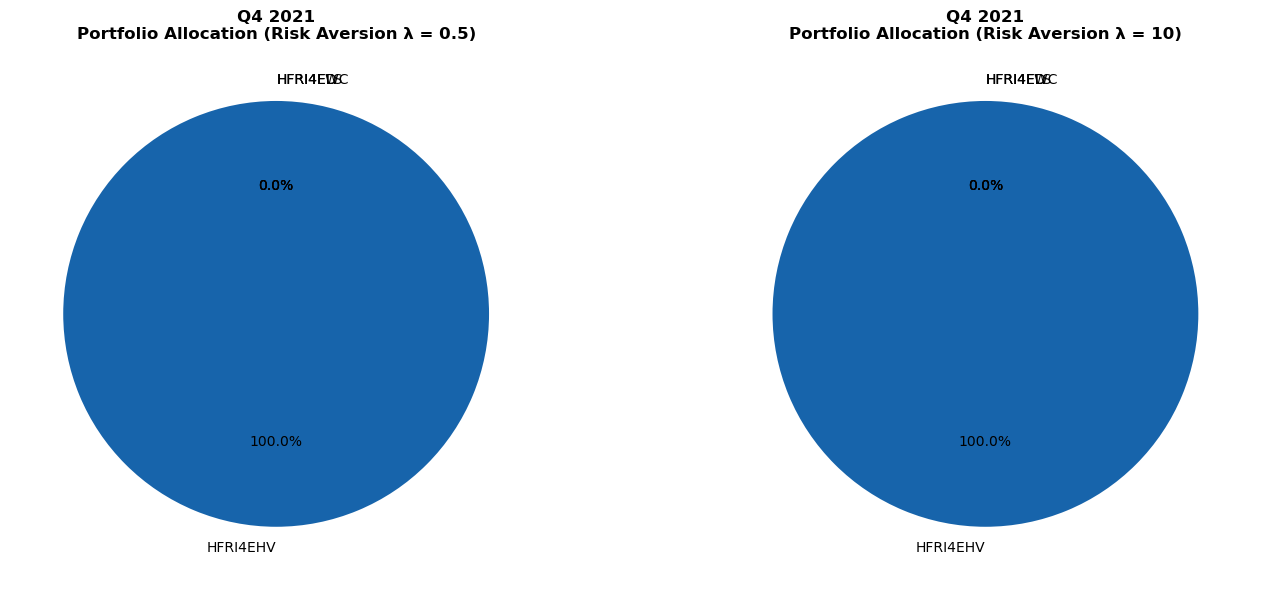

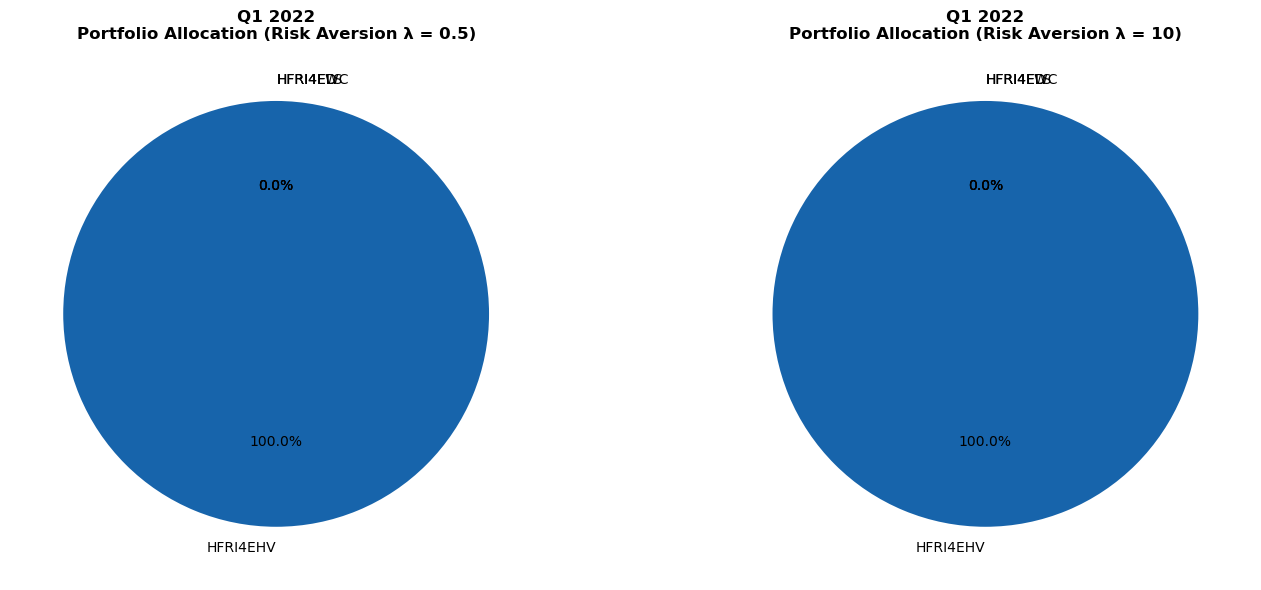

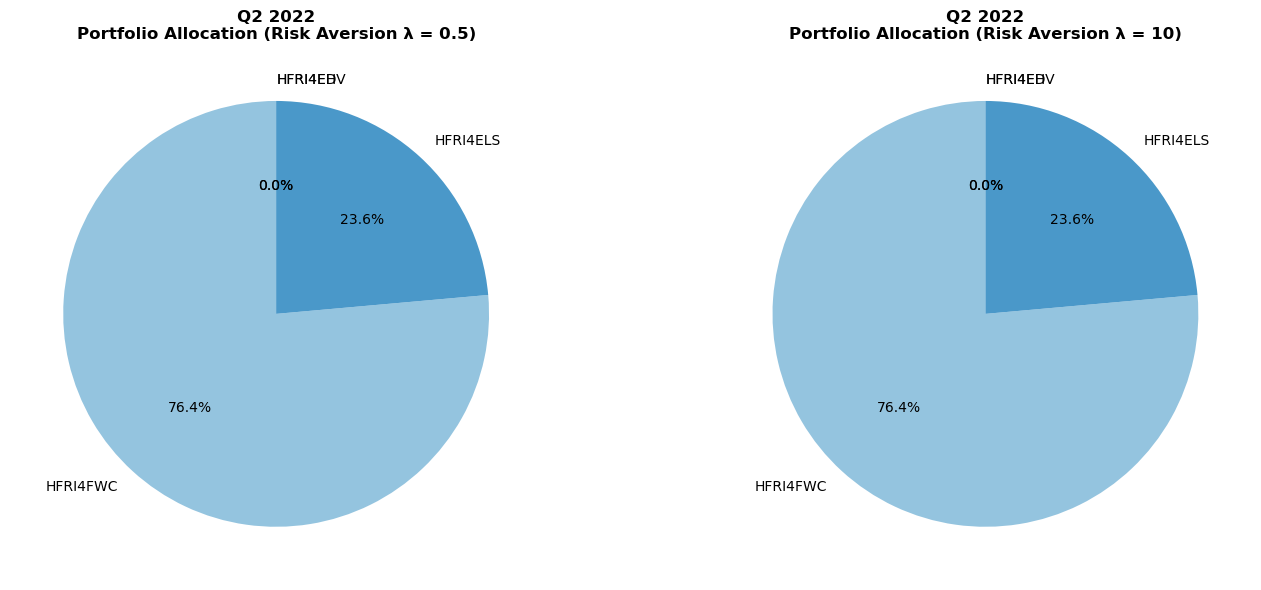

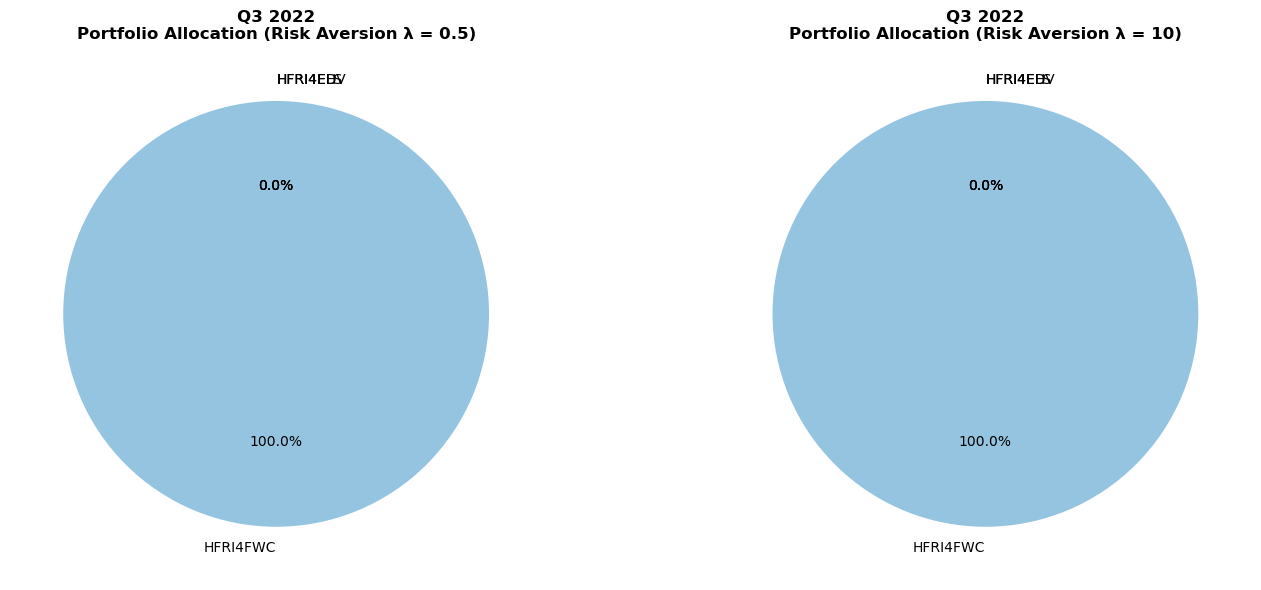

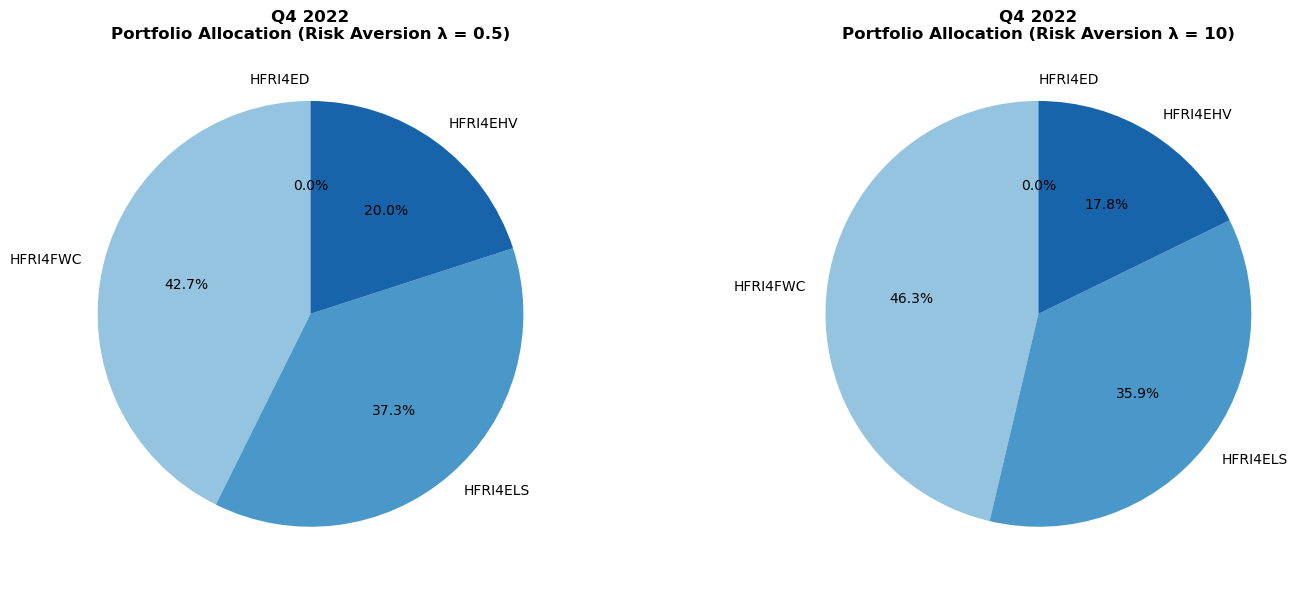

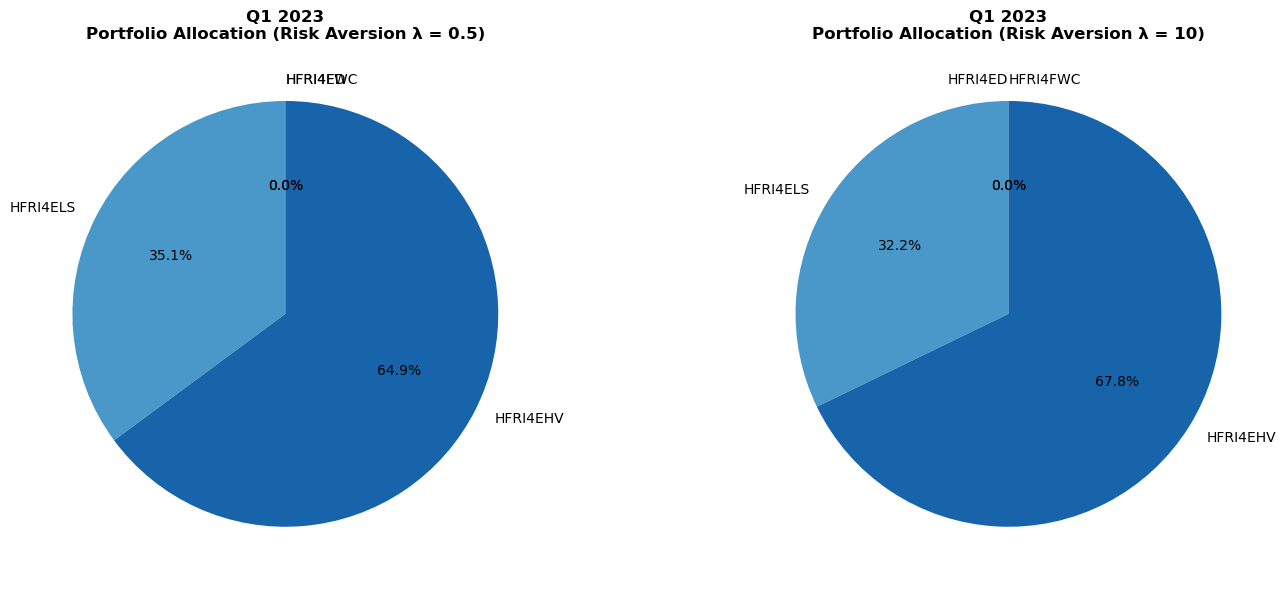

In [3]:
asset_names = [col for col in portfolio_weights_05.columns if col != 'Quarter']

# Generate navy blue gradient colors
cmap = cm.get_cmap('Blues')
num_assets = len(asset_names)
colors = [cmap(0.4 + 0.6 * (i / (num_assets - 1))) for i in range(num_assets)]

# Get all quarters
quarters = portfolio_weights_05['Quarter'].tolist()

# Create pie charts for each quarter
for quarter in quarters:
    # Get data for current quarter
    weights_05_row = portfolio_weights_05[portfolio_weights_05['Quarter'] == quarter]
    weights_10_row = portfolio_weights_10[portfolio_weights_10['Quarter'] == quarter]
    
    if len(weights_05_row) == 0 or len(weights_10_row) == 0:
        continue
    
    # Extract weights (convert percentages to numbers if they're strings)
    weights_05 = []
    weights_10 = []
    
    for asset in asset_names:
        # Handle percentage strings (remove % and convert to float)
        weight_05 = weights_05_row[asset].iloc[0]
        weight_10 = weights_10_row[asset].iloc[0]
        
        if isinstance(weight_05, str) and '%' in weight_05:
            weight_05 = float(weight_05.replace('%', ''))
        weights_05.append(weight_05)
        
        if isinstance(weight_10, str) and '%' in weight_10:
            weight_10 = float(weight_10.replace('%', ''))
        weights_10.append(weight_10)
    
    # Create subplot for this quarter
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Pie chart for λ = 0.5
    axes[0].pie(weights_05, labels=asset_names, autopct='%1.1f%%', 
                startangle=90, colors=colors)
    axes[0].set_title(f'{quarter}\nPortfolio Allocation (Risk Aversion λ = 0.5)', 
                      fontweight='bold')
    
    # Pie chart for λ = 10
    axes[1].pie(weights_10, labels=asset_names, autopct='%1.1f%%', 
                startangle=90, colors=colors)
    axes[1].set_title(f'{quarter}\nPortfolio Allocation (Risk Aversion λ = 10)', 
                      fontweight='bold')
    
    plt.tight_layout()
    plt.show()